# **Đồ án: Sentiment analysis for Vietnamese with CNN + LSTM**

## **Team: DO THIS DO THAT**

**Thành viên:** 

1. Phạm Trung Sơn - 19518291 
2. Trương Thị Cẩm Ly - 19532211
3. Lê Thanh Phong - 19475611 
4. Phan Chí Trung - 19499041
5. Trịnh Ngọc Đức - 19469091

### **Lý do chọn đề tài:**
Trong những năm gần đây, với sự phát triển mạnh mẽ và vượt bậc của Internet từ đó lượng dữ liệu sinh ra ngày càng lớn mà chúng ta nhận thấy rõ ràng nhất là dữ liệu dạng số và dữ liệu dạng văn bản. Dữ liệu dạng văn bản là dạng dữ liệu phi cấu trúc bao gồm các tài liệu, phản hồi, bình luận, có thể là dạng các từ, câu, thậm chí là các đoạn văn bản dài ngắn khác nhau. Từ đó dạng dữ liệu này cung cấp cho ta một lượng lớn thông tin phong phú hơn là dữ liệu dạng số. 

Đặc biệt là 2 năm trở lại đây do tình hình COVID-19 ở Việt Nam mà người dân hạn chế ra đường nhất có thể và việc mua sắm trực tuyến ngày càng tăng lên. Và  nhu cầu tham khảo các phản hồi của những khách hàng trước đó ngày càng cao. Thế nên, những trang mạng hiện nay được phát triển cho phép các người dùng có thể chia sẻ những trải nghiệm, đánh giá, nhận xét và phản hồi về các loại hình dịch vụ, sản phẩm của các doanh nghiệp, tổ chức. Từ đó, thu thập thông tin để đưa ra các hướng đi đúng đắn hơn. Tuy nhiên, với số lượng lớn dữ liệu khó mà có thể phân tích thủ công hết được. Để giải quyêt vấn đề này, chúng em đã phân tích cảm xúc người dùng Việt Nam một cách tự động bằng phương pháp học máy.

### **Tóm tắt:** 
  
  Phân tích cảm xúc người dùng là một bài toán quen thuộc trong lĩnh vực xử lý ngôn ngữ tự nhiên. Bài toán có đầu vào là dữ liệu văn bản, đầu ra sẽ là cảm xúc của đầu vào. Nó có thể là tích cực (*positive*), tiêu cực (*nagative*) và trung lập (*neutral*).

  Việc rút trích và phân loại cảm xúc trong các bình luận là bài toán thiết thực nhưng cũng rất phức tạp, đặc biệt là phân tích cảm xúc đúng theo đối tượng đề cập trong bài viết. ở đây , đề tài sử dụng **phương pháp học máy**: 

> **SVM (Support Vector Machine)**

> **CNN (Convolution Neural Network)** 

> **LSTM (Long Short Term Memory)** 

để giải quyết bài toán phân tích cảm xúc.

  Việc kết hợp giữa **CNN** và **LSTM** đã đưa ra kết quả rất tốt với độ chính xác cao cho việc phân tích cảm xúc cho dữ liệu tiếng Anh. Tuy nhiên, không có quá nhiều nghiên cứu về cách tiếp cận này đối với dữ liệu tiếng Việt. Nên trong đồ án này **CNN** và **LSTM** sẽ được sử để phân tích cảm xúc người dùng với dữ liệu tiếng Việt.










### **Natural Language Processing (NLP) - Xử lý ngôn ngữ tự nhiên**

Một trong những vấn đề sử dụng **NLP (Xử lý ngôn ngữ tự nhiên)** và **học có giám sát** là "Phân loại văn bản", đây là một ví dụ của học có giám sát từ nhãn và dữ liệu chứa trong một văn bản và những nhãn đó dùng để đào tạo một trình phân loại.

Mục tiêu của phân loại văn bản là tự động hóa phân loại văn bản vào một hoặc nhiều danh mục (chuyên mục) đã được xác định trước đó.

Một vài ví dụ của phân loại văn bản là:

- Phân loại cảm xúc của người viết bài (vui, buồn, tức giận...) từ mạng xã hội.

- Phát hiện thư rác

- Tự động gán nhãn các truy vấn của khách hàng.

- Phân loại các bài báo thành các chủ đề đã được xác định trước,

#### **Một kiến trúc end-to-end phân loại văn bản bao gồm các thành phần sau:**

**Văn bản cần training:** Dữ liệu đầu vào mà mô hình học có giám sát của chúng ta có thể hiểu và dự đoán được các lớp cần thiết.

**Feature Vector:** Một feature vector là một vector bao gồm thông tin chi tiết các đặc tính của dữ liệu đầu vào.

**Labels:** Categories/ classes mà mô hình của chúng ta cần dự đoán.

**Thuật toán Machine Learning:** Đây là thuật toán mà model của tôi có thể xử lý để phân loại văn bản (trong trường hợp này, bài toán sử dụng sử dụng: SVM, CNN, LSTM)

**Dự đoán mô hình:** Một mô hình đã được train trước đó sẽ được dùng để dự đoán nhãn cho văn bản.


![https://cdn.noron.vn/2018/08/14/cae8af78e15b8df096696ca86750f97a.jpg?w=600](https://cdn.noron.vn/2018/08/14/cae8af78e15b8df096696ca86750f97a.jpg?w=600)

## Import libraries

In [1]:
!pip install pyvi
!pip install --upgrade gensim

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from string import punctuation
from sklearn.utils import shuffle
from pyvi import ViTokenizer
import re
import keras
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
from textblob import Word

In [3]:
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.layers import Conv1D, MaxPooling1D
from keras.callbacks import ModelCheckpoint
from keras.layers import Input, Dense, concatenate, Activation
from keras.models import Model
from sklearn.model_selection import train_test_split
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
import gensim
from gensim.models.word2vec import Word2Vec
from gensim.models.doc2vec import TaggedDocument
import multiprocessing
from sklearn import utils
from gensim.models import KeyedVectors
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold

In [5]:
pd.set_option('display.max_colwidth', -1)

# set default format of float_value display
pd.options.display.float_format = '{:.2f}'.format

# display multiple dataframe side by side in console area
from IPython.display import display, HTML
css = """
.output {
    flex-direction: row;
}
"""
HTML('<style>{}</style>'.format(css))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


## Data Preprocessing 

In [6]:
data = pd.read_csv('VLSP2016_SA-new.csv')
data.head(10)

content     class
0  Đang xài MX1. Dùng bình thường ngon, pin trâu. Mỗi tội 2-3 thằng cùng dùng mà ngồi một chỗ thì cà giựt cà tang. Chắc bị lẫn vào nhau.                                                                                                                                         positive
1  Qủa pin ngon, sạc lại được, bền. Riêng em dùng Pin AA, AAA dễ thay thế, thích hơn                                                                                                                                                                                             positive
2  cũng đang xài 1 con logitech bluetooth tầm thấp M185 xài đc gần 3 năm mà vẫn còn ngon chán                                                                                                                                                                                    positive
3  Logitech pin trâu thôi rồi, mua 1 con B175 cùi mà cục pin theo chuột 3 năm chưa phải thay! ai chê thì chê chứ tôi thấy chuột Logitech xài hơi bị thích !                                                                                                         positive
4  Em có con chuột không dây 150k cũng đầy đủ nút bấm dùng 2 năm rồi, hết pin là thay thôi                                                                                                                                                                                       positive
5  Đúng vậy, con V470 Bluetooth cũng trâu không kém cạnh. Bên cạnh đó bấm chuột logitech rồi thì phải xài nó hoặc hãng cao hơn thôi. Genius, Mitsumi, Dell chắc chưa đến tuổi...                                                                                                 positive
6  Mình đang sài con này dùng cực thích.                                                                                                                                                                                                                                         positive
7  dùng 510 thích lắm, ko thì con mx anywhere là ổn                                                                                                                                                                                                                              positive
8  mới làm con Dragon War G9 Thor , xài ngon nhưng build chưa cao cấp lắm, đóng gói còn thô sơ, thương hiệu nhật làm tại TQ mà sao hơi bèo. đúng với giá gần 300k. Build ngon xíu nữa bán 600k mọi ng đổ xô nhau đi mua cho coi. Ý là đang nói con chuột G9 của mình đấy haha    positive
9  Em được người thân cho con chuột lazer Logitech xài 5 năm rùi chưa hư mà ko rõ hiệu gì. Search trên mạng thì hình giống con M505 nhưng mà cục gắn vào máy tính thì của em nó bự hơn y như USB vậy. Và dùng pin tiểu AAA chứ ko phải AA như mấy trang Viet Nam hay rao.        positive

In [7]:
data.iloc[103]

content    http://cuahangtcs.com/collections/v...vong-deo-tay-thong-minh-i5?variant=1005523406 Vòng đeo tay thông minh i5 Plus TỔNG HỢP - THẢO LUẬN VÀ CÁC VẤN ĐỀ LIÊN QUAN ĐẾN SẢN PHẨMhttp://tnews.vn/index.php?threads/43/Review giới thiệu :Giới thiệu kèm hướng dẫn Update firmware I5 PlusLink download firmware  I5... cuahangtcs.com i5+ kém cái đo nhịp tim, hơn chỗ hiện tên, sđt người gọi đến, đọc tin nhắn đến, bấm tìm đt, điều khiển chụp ảnh từ xa. Cái chính là nó 389k, mềnh đang dùng 1 cái 2 tháng nay rất ưng ý với nó...  
class      positive                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [8]:
# remove links

data['content'] = data['content'].str.replace(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '')

In [9]:
data.iloc[103]

content     Vòng đeo tay thông minh i5 Plus TỔNG HỢP - THẢO LUẬN VÀ CÁC VẤN ĐỀ LIÊN QUAN ĐẾN SẢN  giới thiệu :Giới thiệu kèm hướng dẫn Update firmware I5 PlusLink download firmware  I5... cuahangtcs.com i5+ kém cái đo nhịp tim, hơn chỗ hiện tên, sđt người gọi đến, đọc tin nhắn đến, bấm tìm đt, điều khiển chụp ảnh từ xa. Cái chính là nó 389k, mềnh đang dùng 1 cái 2 tháng nay rất ưng ý với nó...  
class      positive                                                                                                                                                                                                                                                                                                                                                                                           
Name: 103, dtype: object

In [10]:
replace_list = {
        'òa': 'oà', 'óa': 'oá', 'ỏa': 'oả', 'õa': 'oã', 'ọa': 'oạ', 'òe': 'oè', 'óe': 'oé','ỏe': 'oẻ',
        'õe': 'oẽ', 'ọe': 'oẹ', 'ùy': 'uỳ', 'úy': 'uý', 'ủy': 'uỷ', 'ũy': 'uỹ','ụy': 'uỵ', 'uả': 'ủa',
        'ả': 'ả', 'ố': 'ố', 'u´': 'ố','ỗ': 'ỗ', 'ồ': 'ồ', 'ổ': 'ổ', 'ấ': 'ấ', 'ẫ': 'ẫ', 'ẩ': 'ẩ',
        'ầ': 'ầ', 'ỏ': 'ỏ', 'ề': 'ề','ễ': 'ễ', 'ắ': 'ắ', 'ủ': 'ủ', 'ế': 'ế', 'ở': 'ở', 'ỉ': 'ỉ',
        'ẻ': 'ẻ', 'àk': u' à ','aˋ': 'à', 'iˋ': 'ì', 'ă´': 'ắ','ử': 'ử', 'e˜': 'ẽ', 'y˜': 'ỹ', 'a´': 'á',
        #Quy các icon về 2 loại emoj: Tích cực hoặc tiêu cực
        "👹": "nagative", "👻": "positive", "💃": "positive",'🤙': ' positive ', '👍': ' positive ',
        "💄": "positive", "💎": "positive", "💩": "positive","😕": "nagative", "😱": "nagative", "😸": "positive",
        "😾": "nagative", "🚫": "nagative",  "🤬": "nagative","🧚": "positive", "🧡": "positive",'🐶':' positive ',
        '👎': ' nagative ', '😣': ' nagative ','✨': ' positive ', '❣': ' positive ','☀': ' positive ',
        '♥': ' positive ', '🤩': ' positive ', 'like': ' positive ', '💌': ' positive ',
        '🤣': ' positive ', '🖤': ' positive ', '🤤': ' positive ', '😢': ' nagative ',
        '❤': ' positive ', '😍': ' positive ', '😘': ' positive ', '😪': ' nagative ', '😊': ' positive ',
        '😁': ' positive ', '💖': ' positive ', '😟': ' nagative ', '😭': ' nagative ',
        '💯': ' positive ', '💗': ' positive ', '♡': ' positive ', '💜': ' positive ', '🤗': ' positive ',
        '^^': ' positive ', '😨': ' nagative ', '☺': ' positive ', '💋': ' positive ', '👌': ' positive ',
        '😖': ' nagative ', '😀': ' positive ', '😡': ' nagative ', '😠': ' nagative ',
        '😒': ' nagative ', '🙂': ' positive ', '😏': ' nagative ', '😝': ' positive ', '😄': ' positive ',
        '😙': ' positive ', '😤': ' nagative ', '😎': ' positive ', '😆': ' positive ', '💚': ' positive ',
        '✌': ' positive ', '💕': ' positive ', '😞': ' nagative ', '😓': ' nagative ', '️🆗️': ' positive ',
        '😉': ' positive ', '😂': ' positive ', ':v': '  positive ', '😋': ' positive ',
        '💓': ' positive ', '😐': ' nagative ', '😫': ' nagative ', '😥': ' nagative ',
        '😃': ' positive ', '😬': ' 😬 ', '😌': ' 😌 ', '💛': ' positive ', '🤝': ' positive ', '🎈': ' positive ',
        '😗': ' positive ', '🤔': ' nagative ', '😑': ' nagative ', '🔥': ' nagative ', '🙏': ' nagative ',
        '🆗': ' positive ', '😻': ' positive ', '💙': ' positive ', '💟': ' positive ',
        '😚': ' positive ', '❌': ' nagative ', '👏': ' positive ',
        '🌝': ' positive ',  '🌷': ' positive ', '🌸': ' positive ', '🌺': ' positive ',
        '🌼': ' positive ', '🍓': ' positive ', '🐅': ' positive ', '🐾': ' positive ', '👉': ' positive ',
        '💐': ' positive ', '💞': ' positive ', '💥': ' positive ', '💪': ' positive ',
        '💰': ' positive ',  '😇': ' positive ', '😛': ' positive ', '😜': ' positive ',
        '🙃': ' positive ', '🤑': ' positive ', '🤪': ' positive ','☹': ' nagative ',  '💀': ' nagative ',
        '😔': ' nagative ', '😧': ' nagative ', '😩': ' nagative ', '😰': ' nagative ', '😳': ' nagative ',
        '😵': ' nagative ', '😶': ' nagative ', '🙁': ' nagative ',
        #Chuẩn hóa 1 số sentiment words/English words
        'ô kêi': ' ok ', 'okie': ' ok ', ' o kê ': ' ok ',
        "okey": "ok", 'ôkê': ' ok ', 'oki': ' ok ', ' oke ':  ' ok ',' okay':' ok ','okê':' ok ',
        ' tks ': u' cám ơn ', 'thks': u' cám ơn ', 'thanks': u' cám ơn ', 'ths': u' cám ơn ', 'thank': u' cám ơn ',
        '⭐': 'star ', '*': 'star ', '🌟': 'star ', '🎉': u' positive ',
        'dep': u'đẹp', 'đep': u'đẹp', 'ko ': u' không ',
        'kg ': u' không ','not': u' không ', u' kg ': u' không ', '"k ': u' không ',' kh ':u' không ','kô':u' không ','hok':u' không ',' kp ': u' không phải ',u' kô ': u' không ', '"ko ': u' không ', u' ko ': u' không ', u' k ': u' không ', 'khong': u' không ', u' hok ': u' không ',
        'he he': ' positive ','hehe': ' positive ','hihi': ' positive ', 'haha': ' positive ', 'hjhj': ' positive ',
        ' lol ': ' nagative ',' cc ': ' nagative ','cute': u' dễ thương ','huhu': ' nagative ', ' vs ': u' với ', 'wa': ' quá ', 'wá': u' quá', 'j': u' gì ', '“': ' ',
        ' sz ': u' cỡ ', 'size': u' cỡ ', u' đx ': u' được ', 'dk': u' được ', 'dc': u' được ', 'đk': u' được ', 'đc': u' được ',
        'đc': u' được ','authentic': u' chuẩn chính hãng ',u' aut ': u' chuẩn chính hãng ', u' auth ': u' chuẩn chính hãng ', 'thick': u' positive ', 'store': u' cửa hàng ',
        'shop': u' cửa hàng ', 'sp': u' sản phẩm ', 'gud': u' tốt ','god': u' tốt ','wel done':' tốt ', 'good': u' tốt ', 'gút': u' tốt ',
        'sấu': u' xấu ','gut': u' tốt ', u' tot ': u' tốt ', u' nice ': u' tốt ', 'perfect': 'rất tốt', 'bt': u' bình thường ',
        'time': u' thời gian ', 'qá': u' quá ', u' ship ': u' giao hàng ', u' m ': u' mình ', u' mik ': u' mình ',
        'ể': 'ể', 'product': 'sản phẩm', 'quality': 'chất lượng','chat':' chất ', 'excelent': 'hoàn hảo', 'bad': 'tệ','fresh': ' tươi ','sad': ' tệ ',
        'date': u' hạn sử dụng ', 'hsd': u' hạn sử dụng ','quickly': u' nhanh ', 'quick': u' nhanh ','fast': u' nhanh ','delivery': u' giao hàng ',u' síp ': u' giao hàng ',
        'beautiful': u' đẹp tuyệt vời ', u' tl ': u' trả lời ', u' r ': u' rồi ', u' shopE ': u' cửa hàng ',u' order ': u' đặt hàng ',
        'chất lg': u' chất lượng ',u' sd ': u' sử dụng ',u' dt ': u' điện thoại ',u' nt ': u' nhắn tin ',u' tl ': u' trả lời ',u' sài ': u' xài ',u'bjo':u' bao giờ ',
        'thik': u' thích ',u' sop ': u' cửa hàng ', ' fb ': ' facebook ', ' face ': ' facebook ', ' very ': u' rất ',u'quả ng ':u' quảng  ',
        'dep': u' đẹp ',u' xau ': u' xấu ','delicious': u' ngon ', u'hàg': u' hàng ', u'qủa': u' quả ',
        'iu': u' yêu ','fake': u' giả mạo ', 'trl': 'trả lời', ' por ': u' tệ ',
        ' poor ': u' tệ ', 'ib':u' nhắn tin ', 'rep':u' trả lời ',u'fback':' feedback ','fedback':' feedback '
       }

In [11]:
# Xử lý phần teencode

teencode = []
temp = []
translate = []

with open('teencode.txt', 'r', encoding='UTF-8') as f:
    for s_line in f:
        teencode.append(s_line.split('\t')[0])
        temp.append(s_line.split('\t')[1])

for i in temp:
    translate.append(i.replace('\n',''))

dictionary = dict(zip(teencode, translate))

In [12]:
# Thay thế các từ teencode và các icon
data['content'] = data['content'].str.lower()

data['content'] = data['content'].apply(lambda x:" ".join(replace_list [x] if x in replace_list else x for x in x.split(" ") ))
data['content'] = data['content'].apply(lambda x:" ".join(dictionary [x] if x in dictionary else x for x in x.split(" ") ))
data['content'] = data['content'].apply(lambda x:" ".join([Word(word).lemmatize() for word in x.split()]))

In [13]:
data.head(5)

content     class
0  đang xài mx1. dùng bình thường ngon, pin trâu. mỗi tội 2-3 thằng cùng dùng mà ngồi một chỗ thì cà giựt cà tang. chắc bị lẫn vào nhau.                                  positive
1  quả pin ngon, sạc lại được, bền. riêng em dùng pin aa, aaa dễ thay thế, thích hơn                                                                                      positive
2  cũng đang xài 1 con logitech bluetooth tầm thấp m185 xài được gần 3 năm mà vẫn còn ngon chán                                                                           positive
3  logitech pin trâu thôi rồi, mua 1 con b175 cùi mà cục pin theo chuột 3 năm chưa phải thay! ai chê thì chê chứ tôi thấy chuột logitech xài hơi bị thích !  positive
4  em có con chuột không dây 150k cũng đầy đủ nút bấm dùng 2 năm rồi, hết pin là thay thôi                                                                                positive

In [14]:
def cleanWord(s):
  miss = ['!','@','#','$','%','^','&','*','(',')','-','_','+','=','{','[','}',']','|',':',';','?','/','<','>','~','`','.',',','"']
  for i in miss:
    s = s.replace(i,' ')
  return s

In [15]:
comment = []
for i in data.content:
  doc = (str(i).lower())
  doc = cleanWord(doc)
  # Xóa khoảng cách thừa 
  doc = re.sub(r'\s+', ' ', doc).strip()
  comment.append(doc)

class_ = data['class'].copy()
data = pd.DataFrame({'content':comment, 'class': class_})
data.head(5)

content     class
0  đang xài mx1 dùng bình thường ngon pin trâu mỗi tội 2 3 thằng cùng dùng mà ngồi một chỗ thì cà giựt cà tang chắc bị lẫn vào nhau                                   positive
1  quả pin ngon sạc lại được bền riêng em dùng pin aa aaa dễ thay thế thích hơn                                                                                       positive
2  cũng đang xài 1 con logitech bluetooth tầm thấp m185 xài được gần 3 năm mà vẫn còn ngon chán                                                                       positive
3  logitech pin trâu thôi rồi mua 1 con b175 cùi mà cục pin theo chuột 3 năm chưa phải thay ai chê thì chê chứ tôi thấy chuột logitech xài hơi bị thích  positive
4  em có con chuột không dây 150k cũng đầy đủ nút bấm dùng 2 năm rồi hết pin là thay thôi                                                                             positive

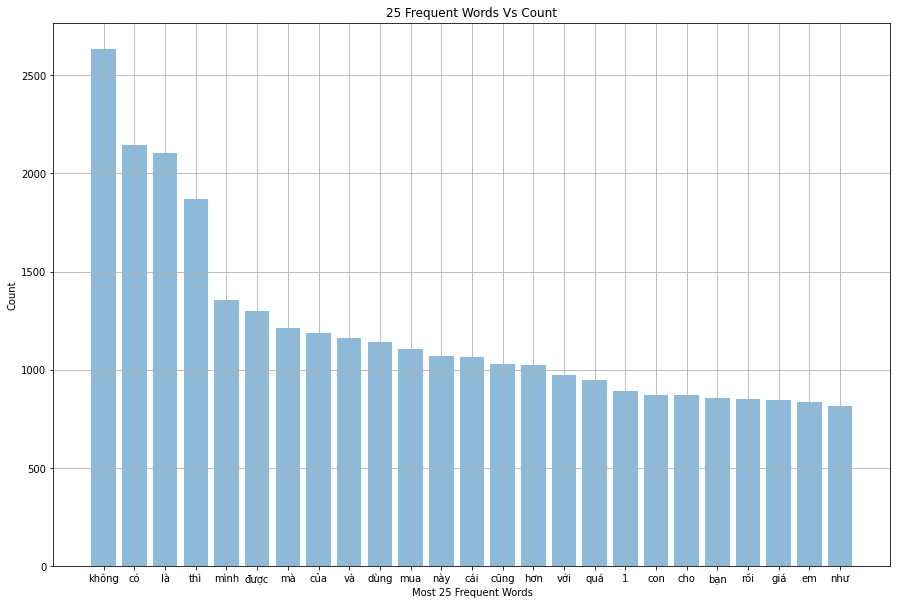

In [16]:
# Tần suất xuất hiện của 25 từ phổ biến nhất.
freq = pd.DataFrame(pd.Series(' '.join(data['content']).split()).value_counts()[:25])

# Đặt lại chỉ số tần số
freq=freq.reset_index()

# Trực quan 25 từ có tần só xuất hiện nhiều nhất
plt.figure(figsize=(15,10))
plt.grid(True)
plt.bar(freq['index'], freq[0], align='center', alpha=0.5)
plt.ylabel('Count')
plt.xlabel('Most 25 Frequent Words')
plt.title('25 Frequent Words Vs Count')
plt.rcParams.update({'font.size': 11})
plt.show()

In [17]:
def preprocessing(data):
    data['content'] = data['content'].str.lower()
    comments = []
    for i in data['content']:
        comments.append(ViTokenizer.tokenize(i))
        
    def remove_punctuation(text):
        text = ''.join([ch for ch in text if ch not in punctuation])
        return text
    
    comments = [remove_punctuation(comment) for comment in comments]
    
    #convert comments to dataframe
    comments = pd.DataFrame(comments, columns = ['comments'])
    #concat labels to dataframe
    comments = pd.concat([data['class'], comments], axis = 1)
    
    return comments
    

In [18]:
data = preprocessing(data)

In [19]:
data.head(5)

class                                                                                                                                              comments
0  positive  đang xài mx1 dùng bìnhthường ngon pin trâu mỗi tội 2 3 thằng cùng dùng mà ngồi một chỗ thì cà giựt càtang chắc bị lẫn vào nhau                      
1  positive  quả pin ngon sạc lại được bền riêng em dùng pin aa aaa dễ thaythế thích hơn                                                                         
2  positive  cũng đang xài 1 con logitech bluetooth tầm thấp m185 xài được gần 3 năm mà vẫn còn ngon chán                                                        
3  positive  logitech pin trâu thôi rồi mua 1 con b175 cùi mà cục pin theo chuột 3 năm chưa phải thay ai chê thì chê chứ tôi thấy chuột logitech xài hơi bị thích
4  positive  em có con chuột không dây 150k cũng đầyđủ nút bấm dùng 2 năm rồi hết pin là thay thôi

             labels  values_count
Tích cực   positive  1700        
Tiêu cực   neutral   1700        
Trung lập  negative  1700         



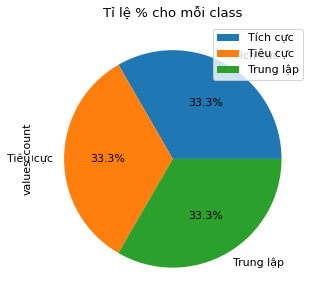

In [20]:
temp = data["class"].value_counts()
label_df = pd.DataFrame({'labels': temp.index,
                   'values_count': temp.values},
                   index=['Tích cực', 'Tiêu cực', 'Trung lập']
                  )
print(label_df,'\n')
plot = label_df.plot.pie(y='values_count', title='Tỉ lệ % cho mỗi class',
                         autopct='%1.1f%%', shadow=False, startangle=0,
                         legend=True, explode=(0, 0, 0), figsize=(20, 5))

In [21]:
data.head()

class                                                                                                                                              comments
0  positive  đang xài mx1 dùng bìnhthường ngon pin trâu mỗi tội 2 3 thằng cùng dùng mà ngồi một chỗ thì cà giựt càtang chắc bị lẫn vào nhau                      
1  positive  quả pin ngon sạc lại được bền riêng em dùng pin aa aaa dễ thaythế thích hơn                                                                         
2  positive  cũng đang xài 1 con logitech bluetooth tầm thấp m185 xài được gần 3 năm mà vẫn còn ngon chán                                                        
3  positive  logitech pin trâu thôi rồi mua 1 con b175 cùi mà cục pin theo chuột 3 năm chưa phải thay ai chê thì chê chứ tôi thấy chuột logitech xài hơi bị thích
4  positive  em có con chuột không dây 150k cũng đầyđủ nút bấm dùng 2 năm rồi hết pin là thay thôi

In [22]:
# shuffle data
data = shuffle(data)

## Machine Learning

* **TF-IDF**

**TF-IDF (Term Frequency – Inverse Document Frequency)** là 1 kĩ thuật sử dụng trong khai phá dữ liệu văn bản. Trọng số này được sử dụng để đánh giá tầm quan trọng của một từ trong một văn bản. Giá trị cao thể hiện độ quan trọng cao và nó phụ thuộc vào số lần từ xuất hiện trong văn bản nhưng bù lại bởi tần suất của từ đó trong tập dữ liệu.

**TF: Term Frequency (Tần suất xuất hiện của từ)** là số lần từ xuất hiện trong văn bản. Vì các văn bản có thể có độ dài ngắn khác nhau nên một số từ có thể xuất hiện nhiều lần trong một văn bản dài hơn là một văn bản ngắn. Như vậy, term frequency thường được chia cho độ dài văn bản ( tổng số từ trong một văn bản).

$$TF(t,d) = \frac{F(t,d)}{max\{F(w,d): w \in d \}}$$

*Trong đó:*    
- $TF(t,d)$ : tần suất xuất hiện của từ t trong văn bản d
- $F(t,d)$ : Số lần xuất hiện của từ t trong văn bản d
- $max\{F(w,d): w \in d \}$ : Số lần xuất hiện của từ có số lần xuất hiện nhiều nhất trong văn bản d

**IDF: Inverse Document Frequency (Nghịch đảo tần suất của văn bản)**, giúp đánh giá tầm quan trọng của một từ . Khi tính toán TF , tất cả các từ được coi như có độ quan trọng bằng nhau.

$$IDF(t,D) = \log \frac{|D|}{|\{d \in D : t \in d\}|}$$

*Trong đó:*    
- $IDF(t,D)$ : giá trị IDF của từ t trong tập văn bản
- $|D|$: Tổng số văn bản trong tập D
-$|\{d \in D : t \in d\}|$ : thể hiện số văn bản trong tập D có chứa từ t

Cơ số logarit trong công thức này không thay đổi giá trị của 1 từ mà chỉ thu hẹp khoảng giá trị của từ đó. Vì thay đổi cơ số sẽ dẫn đến việc giá trị của các từ thay đổi bởi một số nhất định và tỷ lệ giữa các trọng lượng với nhau sẽ không thay đổi.

**Giá trị TF-IDF:**

$${\displaystyle \mathrm {TFIDF} (t,d,D)=\mathrm {TF} (t,d)\times \mathrm {IDF} (t,D)}$$

Những từ có giá trị TF-IDF cao là những từ xuất hiện nhiều trong văn bản này, và xuất hiện ít trong các văn bản khác. Việc này giúp lọc ra những từ phổ biến và giữ lại những từ có giá trị cao (từ khoá của văn bản đó).

In [23]:
tdf = TfidfVectorizer()

In [24]:
X = tdf.fit_transform(data['comments'])
y = data['class'].values
print(X.shape, y.shape)

(5100, 8765) (5100,)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

* **SVM with cross validation data**

**Cross validation** là một kỹ thuật lấy mẫu để đánh giá mô hình học máy trong trường hợp dữ liệu không được dồi dào cho lắm. Để tránh việc trùng lặp giữa các tập kiểm thử

Tham số quan trọng trong kỹ thuật này là **k**, đại diện cho số nhóm mà dữ liệu sẽ được chia ra. Vì lý do đó, nó được mang tên **k-fold cross-validation**. Khi giá trị của k được lựa chọn, người ta sử dụng trực tiếp giá trị đó trong tên của phương pháp đánh giá.

**k-fold cross-validation**

• Tập toàn bộ các ví dụ D được chia thành k tập con không giao nhau (gọi là “fold”) có kích thước xấp xỉ nhau

• Mỗi lần (trong số k lần) lặp, một tập con được sử dụng làm tập kiểm thử, và (k-1) tập con còn lại được dùng làm tập huấn luyện

• k giá trị lỗi (mỗi giá trị tương ứng với một fold) được tính trung bình cộng để thu được giá trị lỗi tổng thể.

**Các lựa chọn thông thường của k**: 10, hoặc 5


**Kỹ thuật này thường bao gồm các bước như sau:**

1. Xáo trộn dataset một cách ngẫu nhiên

2. Chia dataset thành k nhóm
3. Với mỗi nhóm:
  1. Sử dụng nhóm hiện tại để đánh giá hiệu quả mô hình
  2. Các nhóm còn lại được sử dụng để huấn luyện mô hình
  3. Huấn luyện mô hình
  4. Đánh giá và sau đó hủy mô hình
4. Tổng hợp hiệu quả của mô hình dựa từ các số liệu đánh giá

![https://baoboitoithuong.com/cross-validation-la-gi/imager_2_3182_700.jpg](https://baoboitoithuong.com/cross-validation-la-gi/imager_2_3182_700.jpg)

In [26]:
metrics = []
skf = StratifiedKFold(n_splits=5) # k-fold cross-validation
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    classifier = SVC(kernel='rbf', C=50, gamma=5e-2)
    classifier.fit(X_train, y_train)
    y_pred_class = classifier.predict(X_test)

    metrics.append(accuracy_score(y_test, y_pred_class))

metrics = np.array(metrics)
print('Mean accuracy on data test: ', np.mean(metrics, axis=0))
print('Std for accuracy: ', np.std(metrics, axis=0))
print('\n',classification_report(y_test, y_pred_class))

Mean accuracy on data test:  0.6305882352941177
Std for accuracy:  0.01869852282569749

               precision    recall  f1-score   support

    negative       0.64      0.71      0.67       340
     neutral       0.59      0.61      0.60       340
    positive       0.73      0.63      0.68       340

    accuracy                           0.65      1020
   macro avg       0.65      0.65      0.65      1020
weighted avg       0.65      0.65      0.65      1020



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


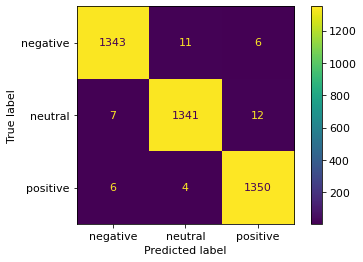

In [27]:
plot_confusion_matrix(classifier, X_train, y_train)
plt.show();

In [28]:
def remove_punctuation(text):
        text = ''.join([ch for ch in text if ch not in punctuation])
        return text
    
def predict(text):
    text = text.lower()
    text = ViTokenizer.tokenize(text)
    text = remove_punctuation(text)
    print(text)
    return print('Đánh giá: ', classifier.predict(tdf.transform([text]))[0])

In [29]:
predict('mọi người hãy cho một câu bình luận bất kì.')

mọi người hãy cho một câu bìnhluận bấtkì 
Đánh giá:  negative


## Deep Learning

### Word Embeddings Data

**Word emmbedding data: kết hợp giữa 2 phương thức cbow + skipgram**

In [30]:
# map class to number
data['class'] = data['class'].map({'positive': 1, 'negative': 0, 'neutral': -1})

In [31]:
X_train, X_test, y_train, y_test = train_test_split(data['comments'], data['class'], test_size=0.2, random_state=42)

In [32]:
def labelize_text_ug(tweets,label):
    result = []
    prefix = label
    for i, t in zip(tweets.index, tweets):
        result.append(TaggedDocument(t.split(), [prefix + '_%s' % i]))
    return result

In [33]:
all_x = pd.concat([X_train])
all_x_w2v = labelize_text_ug(all_x, 'all')

In [34]:
all_x_w2v[:5]

[TaggedDocument(words=['thiết', 'kề', 'mẫu', 'zenfone', 'từ', 'đờiđầu', 'đến', 'đời', 'cuối', 'kiểudáng', 'y', 'chang', 'nhau', 'chán'], tags=['all_3122']),
 TaggedDocument(words=['đắt', 'quá', 'ở', 'bên', 'nướcngoài', 'thì', 'giá', 'hợplý', 'còn', 'ở', 'việt', 'nam', 'thêm', 'tí', 'tiền', 'mua', 'iphone', '6', 'cho', 'lành'], tags=['all_3104']),
 TaggedDocument(words=['cái', 'gì', 'cũng', 'cần', 'thờigian', 'cảithiện', 'bạn', 'à', 'nhưng', 'nói', 'về', 'nhượcđiểm', 'thì', 'htc', 'gần', 'như', 'chả', 'có', 'nhất', 'là', 'htc', '10', 'đang', 'được', 'đánhgiá', 'là', 'camera', 'phone', 'tốt', 'nhất', 'bâygiờ', 'rồi'], tags=['all_717']),
 TaggedDocument(words=['nóichung', 'là', 'chẹp'], tags=['all_929']),
 TaggedDocument(words=['thua', 'cây', 's7', 'thường', 'của', 'mình'], tags=['all_2326'])]

* **CBOW**

**CBOW** (continuous bag of words): là dự đoán từ mục tiêu dựa vào các từ ngữ cảnh xung quanh nó trong 1 phạm vi nhất định. Cho từ mục tiêu ${w_c}$ tại vị trí $c$ trong văn bản, khi đó đầu vào là các từ ngữ cảnh $({w_{c-m},... w_{c-1}, w_{c+1}, ... w{c+m}})$ xung quanh từ ${w_{c}}$ trong phạm vi $m$

- Ý tưởng chính là dựa vào context word (hay các từ xung quanh) để dự đoán center word (từ ở giữa). 
- **CBOW** có điểm thuận lợi là training mô hình nhanh hơn so với skip-gram, thường cho kết quả tốt hơn frequence word (hay các từ thường xuất hiện trong văn cảnh)

Ta cần mô hình hóa dữ liệu sao cho xác suất sau đây đạt giá trị lớn:

$${P("mèo"|"con", "mà", "trèo", "cây", "cau")}$$

Vì có nhiều từ ngữ cảnh trong điều kiện, chúng thường được đơn giản hóa bằng cách lấy một từ "trung bình" làm đại diện:

$${ P(w_t| \bar w)}$$

với ${\bar w_{C_t}}$ là trung bình cộng của các từ trong ngữ cảnh  của từ đích $w_t$. Xác suất này có công thức:

$${P(w_t | \bar w_{C_t}) = \frac{exp(u^T_t \frac{1}{C} \sum_{c \in C_t} \nu_c)}{\sum_{i=1}^N exp (u^T_t \frac{1}{C} \sum_{c \in C_t} \nu_c)}}$$

- Mô hình **CBOW** tổng quát được thể hiện trong hình bên dưới, với kích thước đầu vào gồm **C** từ ngữa cảnh, **V** là kích thước của tập từ vựng và hyperparameter **N** là kích thước của hidden layer. Các unit thuộc các layer kế cận nhau được kết nối theo kiểu fully connected

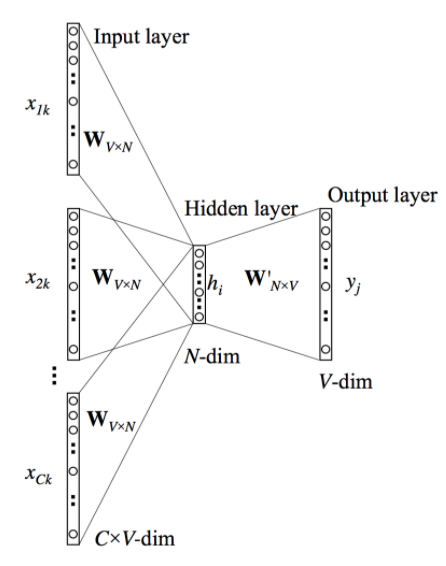



Mỗi từ đầu vào vị trí thứ k trong tập từ vựng được biểu diễn bằng mọt one-hot vector có dạng:
$${x^{(k)} = 
\begin{bmatrix}x_1\\x_2\\\vdots\\x_k\\\vdots\\x_V
\end{bmatrix}
}$$

Tương ứng với mỗi vector $x^{(k)}$ chỉ có một phần tử $x_k$ của nó có giá trị bằng 1 và giá trị của tất cả các phần tử còn lại đều bằng 0.Các trọng số giữa input layer và hidden layer cũng đưỡ biểu diễn thành ma trận $W$ kích thước $V$x$N$ như sau:
$$W_{V𝗑N} = 
\begin{bmatrix}
w_{11} & w_{12} & \dots & w_{1N}\\
w_{21} & w_{22} & \dots & w_{2N}\\
\vdots & \vdots & \ddots & \vdots\\
w_{v1} & w_{v2} & \cdots & w_{VN}
\end{bmatrix}
$$

Mỗi hàng của ma trận $W$ là một biểu diễn vector $v_w$ có số chiều là $N$ tương ứng với một từ $w$ trong tập từ vựng. Ma trận h có kích thước $N$ x $1$ có dạng như sau:

$$h = 
\begin{bmatrix}
h_1\\h_2\\\vdots\\h_N
\end{bmatrix}
$$

Mỗi phần tử của ma trạn $h$ tươn gứng với output của mỗi hidden layer unit. Activaiton function của các hidden layer unit đều là hàm tuyến tính $\varphi(x) = x$. Ta có:

$${W^Tx^{(k)} = 
\begin{bmatrix}
w_{11} & w_{21} & \cdots & w_{V1}\\
w_{12} & w_{22} & \cdots & w_{V2}\\
\vdots & \vdots & \ddots & \vdots\\
w_{1N} & w_{2N} & \cdots & w_{VN}
\end{bmatrix}
} 
\begin{bmatrix}
x_1\\x_2\\\vdots\\x_k\\\vdots\\x_V
\end{bmatrix}
$$

$$
= \begin{bmatrix}w_{k1}x_k \\w_{k2}x_k\\\vdots\\w_{kN}x_k
\end{bmatrix}
= \begin{bmatrix}
w_{k1}\\w_{k2}\\\vdots\\w_{kN}
\end{bmatrix}
= W^T_{k} = v^T_{wk}
$$
Sử dụng kết quả này, ta tính được h như sau:
$$
h = \frac{1}{C} W^T (x^{(1)} + x^{(2)} + \cdots+x^{(C)})
$$

$$
= \frac{1}{C} (v^T_{w_{I,1}} + v^T_{w_{I,2}}+\cdots+v^T_{w_{I,C}})
$$

$$
=\frac{1}{C} (v_{w_{I, 1}}+v_{w_{I, 2}}+v_{w_{I, C}})^T
$$
Trong đó các one-hot vector $x^{(1)},\cdots x^{(C)}$ tương ứng lần lượt với các từ ngữ cảnh đầu vào $w_{I,1}, \cdots, w_{I, C}$ và $w_O$ là từ đầu ra của mô hình. Từ hidden layer đến output layer là các trọng số được biểu diễn bằng một ma trận $W' = \left\{ w'_{ij}\right\}$ khác với kích thước $N$x$V$ có dạng như sau:

$$W'_{V𝗑N} = 
\begin{bmatrix}
w'_{11} & w'_{12} & \dots & w'_{1N}\\
w'_{21} & w'_{22} & \dots & w'_{2N}\\
\vdots & \vdots & \ddots & \vdots\\
w'_{v1} & w'_{v2} & \cdots & w'_{VN}
\end{bmatrix}
$$

chúng ta sẽ tính điểm số $u_j$ cho mỗi từ thứ $j$ trong tạp từ vựng theo công thức sau:
$$
u_j = {v'_{wj}}^Th
$$
Trong đó $v'_{wj}$ là cột thứ j của ma trận $W'$. Điểm số $u_j$ chính là thước đo độ khớp giữa $C$ từ ngữ cảnh đầu vào cho trước và từ $w_j$. Chúng ta sẽ sử dụng hàm $softmax$ để chuẩn hóa phân phối hậu nghiệm (posterior distribution) của mỗi từ trong tập từ vựng sau:

$$
p(w_O|w_{I,1},\dots,w_{I,C})=y_j=\frac {exp(u_j)}{\sum_{j'=1}^V exp(u_{j'})}
$$
Trong đó $y_j$ cúng chính là output của unit thứ $j$ trong output layer. Mục tiêu của quá trình huấn luyện là điều chỉnh các trọng số để cực đại hóa hàm phaan phối bên trên đối với từ $w_O$ và các từ ngữ cảnh $w_{I, 1}\dots,w_{I,C}$cho trước:    
$$ max(p(w_O|w_{I,1},\dots,w_{I,C})) = max(log(p(w_O|w_{I,1},\dots,w_{I,C})))$$
$$=min(-log(p(w_O|w_{I,1},\dots,w_{I,C})))=min(E)$$
Trong đó $E$ là hãm lỗi cần được cực tiểu hóa và có công thức sau:

$$E=-log(p(w_O|w_{I,1},\dots,w_{I,C}))$$
$$=-u_{j^*} + log(\sum_{j'=1}^V exp(u_{j'}))$$
$$=-{v'_{w_O}}^Th+log(\sum_{j'=1}^V exp({v'_{w_j}}^Th))$$
Trong đó $j^*$ là vị trí hiện có của từ ddaaud tra trong output layer. Phương trình cập nhật các trọng số từ hidden layer đến output layer:
$$v^{(new)}_{{w_j}'}- \eta.\frac {\partial E}{\partial u_j}.h với c = 1, 2,....,C$$ 

Trong đó $v_{w_c}$ là input vector tương ướng với từ thứ $c$ trong $C$ từ ngữ cảnh đàu vào và $\eta$ là learning rate. Sau khi quá trình huấn luyện hoàn tất, chúng ta thu được kết quả cuối cùng của ma trận $W$ và ma trận $W'$. Tương ứng với mỗi từ $w_j$ trong tập từ vựng đều tồn tại $v_{w_j}$ và $v'_{w_j}$ là 2 vector khác nhau cùng đại diện cho nó. Vector $v_{w_j}$ được gọi là input vector và tương ứng với hàng thứ $j$ trong ma trận $W$. Vector $v'_{w_j}$ được gọi là output vector và tương ứng cột thứ $j$ trong ma trận $W'$. Quá trình huấn luyện cho các input vector tốn ít chi phí hơn trong khi quá trình huấn luyện output vector tốn khá nhiều chi phí

In [35]:
cores = multiprocessing.cpu_count()
model_ug_cbow = Word2Vec(sg=0, vector_size=100, negative=5, window=2, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)

In [36]:
model_ug_cbow.build_vocab([x.words for x in tqdm(all_x_w2v)])

100%|██████████| 4080/4080 [00:00<00:00, 651964.35it/s]


In [37]:
%%time
for epoch in range(30):
    model_ug_cbow.train(utils.shuffle([x.words for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_ug_cbow.alpha -= 0.002
    model_ug_cbow.min_alpha = model_ug_cbow.alpha

100%|██████████| 4080/4080 [00:00<00:00, 2225615.86it/s]


CPU times: user 6.86 s, sys: 127 ms, total: 6.99 s
Wall time: 4.23 s


* **SKIPGRAM**

Ý tưởng của mô hình Skip-gram đối lập với **CBOW**, các từ mục tiêu bây giờ trở thành đầu vào và các từ ngữ cảnh trong câu trở thành đầu ra. Cho từ mục tiêu $w_c$ tại vị trí $c$ trong câu văn bản , khi đó đầu vào của mô hình skip-gram cũng chính là từ mục tiêu $w_c$ và đầu ra của mô hình là các từ ngữ cảnh $(w_{c-m},\dots w_{c-1}, w_{c+1},\dots w_{c+m})$ xung quanh từ $w_c$ trong phạm vi $m$. Ví dụ cho trước từ "*trèo cây*" thì đầu ra sẽ tìm những từ xung quanh từ "*trèo cây*" này. Mô hình tổng quát:

<figure>
<center>
<img src='https://nguyentruonglong.net/images/SkipGram.png' />
<figcaption>Hình ảnh minh họa cho mô hình Skip-gram ở dạng tổng quát </figcaption></center>
</figure>

- Input: 1 từ mục tiêu duy nhất
- output: $C$ từ ngữ cảnh xung quanh từ mục tiêu đầu vào

Trong đó:
- $V$ là kích thước của tập từ vựng trong tạp ngữ liệu dùng để huấn luyện
- Hyperparameter $N$ là kích thước của hidden layer. Các unit thuộc các layer kế cận nhau được kết nối theo kiểu fully connected. Gọi $v_{wI}$ là vector đầu vào đại diện cho từ đầu vào duy nhất $w_I$. Các từ trong câu đầu vào của mô hình dược chuyển về dưới dạng vector one-hot $x^{(k)}$:
$$
x^{(k)} = \begin{bmatrix}
x_1\\x_2\\ \vdots \\ x_k \\ \vdots \\ x_V
\end{bmatrix}
$$

Ma trận $W$ với kích thước $V$x$N$ là ma trận trọng số từ lớp đầu và đến lớp ẩn có dạng như sau:
$$
W_{V𝚇N} = \begin{bmatrix}
w_{11}&w_{12}& \cdots & w_{1N}\\
w_{21} & w_{22} & \cdots & w_{2N}\\
\vdots & \vdots & \ddots & \vdots\\
w_{V1} & w_{V2} & \cdots & w_{VN}
\end{bmatrix}
$$

Trong ma trận $W$ , mỗi hàng thứ $i$ của ma trận chính là vector đại diện tương ứng cho từ thứ $i$ trong tập từ vựng và $N$ do chúng ta định nghĩa. Ma rạn nè thu được sau khi huấn luyện là kết quả cần quan tâm do chứa các vector đại diện cho các từ trong tập từ vựng. Ma trận $h$ của lớp ẩn kích thước là $N$x$1$ có dạng như sau:
$$
h = \begin{bmatrix}
h_1\\h_2\\ \vdots \\ h_N
\end{bmatrix}
$$

Mỗi phần tử của ma trận $h$ tương ứng với output của mỗi hidden layer unit. Activation function của các hidden layer unti đều là hàm tuyến tính $\varphi(x) = x$. Ma trận $W'$ có chiều $N$x$V$ là ma trận trọng số từ lớp ẩn đến lớp đầu ra có dạng:
$$
W^{'}_{V𝚇N} = \begin{bmatrix}
w'_{11}&w'_{12}& \cdots & w'_{1N}\\
w'_{21} & w'_{22} & \cdots & w'_{2N}\\
\vdots & \vdots & \ddots & \vdots\\
w'_{V1} & w'_{V2} & \cdots & w'_{VN}
\end{bmatrix}
$$

Trong đầu ra thay vì chỉ có 1 phân phối, chúng tạo ra $C$ phân phối. Gọi $y_{c, j}$ là phần tử thứ $j$ trong vector đầu ra thứ $c$ với $c=1,2,\dots,C$. Do $x^{(k)}$ là vector one-hot đầu vào duy nhất nen $h$ được tính như sau:
$$h=W^T_{k,} = v^T_{w_I}$$

Giá trị của $y_{c, j}$ biểu diễn cho xác suất xuất hiện của từ thứ $j$ trong tập từ vựng gồm $V$ từ ở đầu ra thứ $c$ được tính như sau:

$$
p(w_{c,j}=w_{O,c}|w_I) = y_{c,j}=
\frac {\exp (u_{c,j})}{\sum^V_{j'=1} \exp(u_{j'})}
$$

Trong đó $w_{c,j}$ là từ thứ $j$ trong tập từ vựng gồm $V$ từ tương ứng ở đầu ra thứ $c$ và $w_{O,c}$ là từ ngữ cảnh đầu ra thứ $c$ hiện tại. Do các đầu ra đều sử dụng chung các trọng số nên $u_{c,j}$ được tính bằng công thức:

$$u_{c,j}=u_j={v'_{w_j}}^T.h, c=1,2,\dots,C$$

Trong đó v'_{w_j} là vector đầu ra của từ thứ $j$ trong tập từ vựng $w_j$ và lấy từ cột tương ứng của ma trận trọng số $W'$. Hàm mất mát $E$ được cho bởi công thức:

$$E = -log\space p(w_{O,1}, w_{O,2},\dots,w_{O,C}|w_I)$$

$$= -log \space \Pi^C_{c=1} \frac{\exp(u_{c,j^*_c})}{\sum^V_{j'=1}\exp(u_{j'})}$$

$$= -\sum^C_{c=1}u_{j^*_c} + C.log \sum^V_{j'=1}\exp(u_{j'})$$

Trong đó $j^*_c$ là vị trí hiện tại của từ ngữ cảnh thứ $c$ trong tập từ vựng. Các trọng số từ lớp ẩn đến lớp đầu ra trong ma trận $W'$ được cập nhật theo phương trình:
$$v_{w_I}^{(new)} = v_{w_I}^{(old)}- \eta.EH^T $$

Trong đó $EH$ là một vector có $N$ chiều và mỗi phần tử của nó được tính:
$$EH_i = \sum^V_{j=1}EI_j.w'_{ij}$$

In [38]:
model_ug_sg = Word2Vec(sg=1, vector_size=100, negative=5, window=2, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_ug_sg.build_vocab([x.words for x in tqdm(all_x_w2v)])

100%|██████████| 4080/4080 [00:00<00:00, 648505.39it/s]


In [39]:
%%time
for epoch in range(30):
    model_ug_sg.train(utils.shuffle([x.words for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_ug_sg.alpha -= 0.002
    model_ug_sg.min_alpha = model_ug_sg.alpha

100%|██████████| 4080/4080 [00:00<00:00, 1614411.35it/s]


CPU times: user 12.8 s, sys: 169 ms, total: 12.9 s
Wall time: 7.41 s


In [40]:
model_ug_cbow.save("w2v_model_ug_cbow.word2vec")
model_ug_sg.save("w2v_model_ug_sg.word2vec")

In [41]:
model_ug_cbow = KeyedVectors.load("w2v_model_ug_cbow.word2vec")
model_ug_sg = KeyedVectors.load("w2v_model_ug_sg.word2vec")

* **Concatenate 2 methods**

In [42]:
embeddings_index = {}
for w in model_ug_cbow.wv.index_to_key:
    embeddings_index[w] = np.append(model_ug_cbow.wv[w],model_ug_sg.wv[w])
print('Found %s word vectors.' % len(embeddings_index))

Found 4163 word vectors.


In [43]:
tokenizer = keras.preprocessing.text.Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\]^`{|}~ ')
tokenizer.fit_on_texts(X_train)

In [44]:
sequences_digit = tokenizer.texts_to_sequences(X_train)

In [45]:
length = []
for x in X_train:
    length.append(len(x.split()))
max(length)

2472

In [46]:
x_train_seq = pad_sequences(sequences_digit, maxlen=150)
print('Shape of data tensor:', x_train_seq.shape)

Shape of data tensor: (4080, 150)


In [47]:
sequences_val = tokenizer.texts_to_sequences(X_test)
x_val_seq = pad_sequences(sequences_val, maxlen=150)

In [48]:
print('Shape of data tensor:', x_val_seq.shape)

Shape of data tensor: (1020, 150)


In [49]:
num_words = 10000
embedding_matrix = np.zeros((num_words, 200))
for word, i in tokenizer.word_index.items():
    if i >= num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

* **labels to vectors**

In [50]:
from tensorflow.keras.utils import to_categorical

labels_train = to_categorical(y_train, num_classes=3)
labels_test = to_categorical(y_test, num_classes=3)

* **Evaluation metrics**

$$Precision = \frac{TP}{TP + FP}$$

$$Recall = \frac{TP}{TP + FN}$$

Tiêu chí đánh giá **F1** hay **F1-score** là sự kết hợp của 2 tiêu chí đánh giá Precision và Recall

$$F_1 = \frac{2.Precision.Recall}{Precision + Recall}=\frac{2}{\frac{1}{Precision}+\frac{1}{Recall}}$$

**F1** là một **trung bình điều hòa (harmonic mean)** của các tiêu chí Precision và Recall

•F1 có xu hướng lấy giá trị gần với giá trị nào nhỏ hơn giữa 2 giá trị Precision và Recall

•F1 có giá trị lớn nếu cả 2 giá trị Precision và Recall đều lớn


In [51]:
from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

### **Convolutional Neural Networks for Natural Language Processing**

Theo truyền thống, chúng ta nghĩ rằng một **mạng tích chập (CNN)** là một mạng thần kinh chuyên dùng để xử lý một lưới các giá trị như hình ảnh. Và **mạng thần kinh tái phát (RNN)** là mạng thần kinh chuyên dùng để xử lý một chuỗi các giá trị.

Nhưng gần đây, chúng ta cũng đã bắt đầu áp dụng CNN cho các vấn đề trong Xử lý ngôn ngữ tự nhiên và nhận được một số kết quả thú vị.

**Nhiệm vụ phân loại**

Do CNN, không giống như RNN, chỉ có thể xuất ra các vectơ có kích thước cố định, sự phù hợp tự nhiên đối với chúng dường như nằm trong các nhiệm vụ phân loại như Phân tích tình cảm, Phát hiện thư rác hoặc Phân loại chủ đề.

Trong các tác vụ thị giác máy tính, các bộ lọc được sử dụng trong CNN trượt trên các bản vá của hình ảnh trong khi trong các tác vụ NLP, các bộ lọc trượt trên ma trận câu, một vài từ tại một thời điểm.

![https://nguyenvanhieu.vn/wp-content/uploads/2018/07/cach-convolutional-neural-network-giai-quyet-bai-toan-phan-loai-van-ban-1.jpg](https://nguyenvanhieu.vn/wp-content/uploads/2018/07/cach-convolutional-neural-network-giai-quyet-bai-toan-phan-loai-van-ban-1.jpg)

## **Giải thích:**

### **#Sentence**

Ví dụ trên sử dụng câu “I like this movie very much!”. Câu văn này có 6 từ và một dấu câu nữa. Dấu câu này ở đây sẽ được coi như là một từ. Như vậy là chúng ta có 7 từ tất cả. Ở đây tôi chọn số chiều của word vector là 5(tức là mỗi từ sẽ là một vector kích thước 1×5). Giả sử ta gọi d là số chiều của word vector. Như vậy kích thước ma trận của cả câu văn này là 7 x 5.

**Giải thích thêm:** Từ trong trường hợp này chính là một đặc trưng. Tùy bài toán mà người ta có coi dấu câu là đặc trưng hay không. Điều đó phụ thuộc vào việc nó có hữu dụng không. Tức là nếu lấy dấu câu thì có giúp tăng độ chính xác hay không. Do vậy, có nhiều trường hợp dấu câu sẽ bị loại bỏ.

### **#Filters**

Một tính chất mong muốn của thuật toán CNN bên xử lý ảnh là giữ được tính không gian 2 chiều theo góc quan sát của máy tính. Văn bản cũng có tính chất này như ảnh. Nhưng thay vì 2 chiều, văn bảnchỉ  có một chiều và đó là các chuỗi từ liên tiếp. Ở ví dụ trên mỗi từ lại là một vector 5 chiều, do vậy ta cần cố định số chiều của bộ lọc cho phù hợp với số chiều của từ. Như vậy bộ lọc của chúng ta nên có kích thước (? x 5). Dấu ? thể hiện số từ(số hàng) mà chúng ta muốn lấy vào.

Ở bức hình trên, #filters là minh họa cho các bộ lọc. Đây không phải là bộ lọc để lọc bỏ các phần tử khỏi ma trận bị lọc. Điều này sẽ được giải thích kỹ hơn ở đoạn tiếp theo. Ở đây, tác giả sử dụng 6 bộ lọc, các bộ lọc được sử dụng có kích thước (2, 3, 4) từ.

### **#Featuremaps**
Trong đoạn này, chúng tôi sẽ từng bước giải thích cách bộ lọc nhân tích chập (convolutions / filtering). Tôi sẽ làm với vài số đầu tiên và sau đó bạn có thể dễ dàng hiểu và tự làm được.

![https://nguyenvanhieu.vn/wp-content/uploads/2018/07/cach-convolutional-neural-network-giai-quyet-bai-toan-phan-loai-van-ban-2.jpg](https://nguyenvanhieu.vn/wp-content/uploads/2018/07/cach-convolutional-neural-network-giai-quyet-bai-toan-phan-loai-van-ban-2.jpg)


Ảnh phía trên thực hiện việc tính toán cho bộ lọc có kích thước là 2(2 từ). Với giá trị đầu tiên, bộ lọc màu vàng kích thước 2 x 5 thực hiện nhân từng thành phần với 2 hàng đầu tiên của văn bản(I, like).

Nó thực hiện bằng cách:

$$0.51 = 0.6 \times 0.2 + 0.5 \times 0.1 + 0.2 \times 0.2 + ... + 0.1 \times 0.1.$$

Tiếp theo với giá trị thứ 2, bộ lọc màu vàng giữ nguyên nhưng lần này nhân tích chập với ma trận văn bản của 2 từ (like, this) theo cách tương tự:

$$0.53 = 0.8 \times 0.2 + 0.9 \times 0.1 + ... + 0.7 \times 0.1.$$

Cứ như vậy, ma trận bộ lọc(màu vàng) sẽ lùi xuống một dòng cho đến khi hết ma trận văn bản. Như vậy ma trận kết quả sẽ có kích thước là 
$$(7-2 + 1 \times 1) = (6 \times 1).$$

Để bảo đảm giá trị của map đặc trưng, chúng ta cần sử dụng một activation function( vd. ReLU). Áp dụng ReLU vẫn cho chúng ta ma trận có kích thước là 6 x1.

### **#1max**
Lưu ý rằng kích thước của map đặc trưng phụ thuộc vào ma trận văn bản và ma trận bộ lọc. Nói cách khác, map đặc trưng sẽ có kích thước thay đổi chứ không cố định. Để đưa ma trận đặc trưng này về kích thước như nhau. Hoặc trong nhiều trường hợp người ta chỉ muốn giữ lại các đặc trưng **tiêu biểu**. Chúng ta có thể sử dụng max-pooling để lấy ra các giá trị lớn nhất trong map đặc trưng. Điều này giúp giảm chiều dữ liệu, tăng tốc độ tính toán.

Trong ví dụ này, tôi sử dụng 1-max-pooling. Tức là lấy ra 1 giá trị lớn nhất trong từng map đặc trưng. Việc này giúp ta có ma trận output có cùng kích thước. Ở đây kích thước sau khi áp dụng **#1max** là (1×1). Như vậy, ta chỉ lấy 1 đặc trưng trội nhất ở tất cả các lớp cnn để phục vụ cho bài toán.

### **#Concat1max**
Sau khi áp dụng 1-max pooling, chúng ta đã có những vector có kích thước cố định là 1×1 của 6 thành phần(bằng số bộ lọc). Vector cố định kích thước này sau đó được đưa vào một hàm softmax(lớp fully-connected) để giải quyết việc phân loại.


### **Long short term memory (LSTM)**

LSTM là một phiên bản mở rộng của mạng RNN, được thiết kế để giải quyết các bài toán về phụ thuộc xa (long-term
dependencies) trong mạng RNN do bị ảnh hưởng bởi vấn đề gradient biến mất. Có thể hiểu một cách đơn giản là mạng RNN cơ bản trong thực tế không có khả năng ghi nhớ thông tin từ các bước có khoảng cách xa và do đó những phần tử đầu tiên trong chuỗi đầu vào không có nhiều ảnh hưởng đến các kết quả tính toán dự đoán phần tử cho chuỗi đầu ra trong các bước sau.

<figure>
<center>
<img src='https://nguyentruonglong.net/images/LSTMCell.png' />
<figcaption>Sơ đồ biểu diễn kiến trúc bên trong của một tế bào LSTM</figcaption></center>
</figure>

Các cổng đều đóng vai trò có nhiệm vụ sàng lọc thông tin với mỗi mục đích khác nhau:    

- Forget gate: Có nhiệm vụ loại bỏ những thông tin không cần thiết nhận được khỏi cell internal state
- Input gate: Có nhiệm vụ chọn lọc những thông tin cần thiết nào được thêm vào cell internal state
- Output gate: Có nhiệm vụ xác định những thông tin nào từ cell internal state được sử dụng như đầu ra 




Trước khi trình bày các phương trình mô tả cơ chế hoạt động bên trong của một tế bào LSTM, sau đây quy ước một số ký hiệu được sử sụng sau đây:     
- **$x_t$** là vector đầu vào tại mỗi bước thời gian **$t$**
- $W_{f,x}, W_{f,h}, W_{\stackrel\sim{s},x}, W_{\stackrel\sim{s},h}, W_{i,x}, W_{i,h}, W_{o,x}, W_{o,h}$ là cá ma trận trọng số trong mỗi tế bào LSTM
- $b_f, b_{\tilde{s}}, b_i, b_o$ là các vector bias
- $f_t,i_t,o_t$ lần lượt chứa các giá trị kích hoạt cho các cổng forget gate, input gate và output gate tương ứng
- $s_t,\stackrel\sim{s}$ lần lượt là các vector đại diện cho cell internal state và candidate value
- $h_t$ là giá trị đầu ra của tế bào LSTM


Trong quá trình lan truyền xuôi (forward pass), cell internal state $s_t$ và giá trị đầu ra $h_t$ được tính như sau:
- Ở bước đầu tiên, tế bào **LSTM** quyết dịnh những thông tin nào cần được loại bỏ từ cell internal state ở bước thời gian trước đó $s_{t-1}$. Activation value $f_t$ của forget gate tại bước thời gian $t$ được tính dựa trên giá trị đầu vào hiện tại $x_t$, giá trị đầu ra $h_{t-1}$ từ tế bào LSTM ở bước trước đó và bía $b_f$ của forget gate. Hàm sigmoid function biến đổi tất cả activation value về miền có giá trị trong khoảng từ 0 (hoàn toàn quên) và 1 (hoàn toàn ghi nhớ):
$$f_t = \sigma(W_{f,x}x_t + W_{f,h}h_{t-1} + b_f)$$
- Ở bước thứ hai, tế bào **LSTM** quyết định những thông tin nào cần được thêm vào cell internal state $s_t$. Bước này bao gồm hai quá trình tính toán đối với $\tilde{s_t}$ và $f_t$. Candidate value $\tilde{s_t}$ biểu diễn những thông tin tiềm năng cần được thêm vào cell internal state được tính như sau:    
$$\tilde{s_t}=tanh(W_{\tilde{s},x}x_t+W_{\tilde{s},h}h_{t-1}+b_{\tilde{s}})$$

  Activation value $i_t$ của input gate theo đó cũng được tính như sau:
  $$i_t = tanh(W_{i,x}x_t+W_{i,h}h_{t-1}+b_i)$$
- Ở bước thứ ba, giá trị mới của cell internal state $s_t$ được tính dựa trên kết quả tính toán thu đucợ từ các bước trước với phép nhân Hadamard theo từng phần tử (Hadamard product) được ký hiệu bằng $	\circ$:
$$s_t = f_t \circ s_{t-1} + i_t \circ \tilde{s}_t$$
- Ở bước cuối cùng, giá trị đầu ra $h_t$ của tế bào LSTM được tính toán dựa theo hai phương trình sau:    
$$o_t = \sigma(W_{o,x}x_t+W_{o,h}h_{t-1}+b_o)$$
$$h_t = o_t \circ tanh(s_t)$$

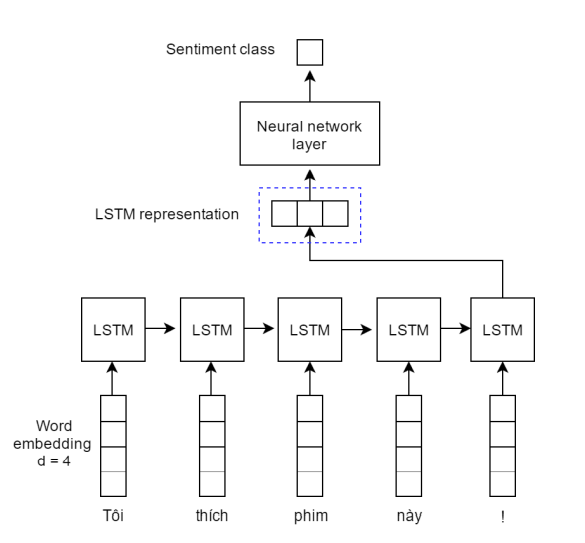

<figure>
<center>
<figcaption>Sơ đồ biểu diễn kiến trúc LSTM đối với đoạn văn bản</figcaption></center>
</figure>

Mô hình trên chỉ là lí thuyết về LSTM, khi áp dụng vào bài toán này thì khi xây dựng model các **activation function (hàm kích hoạt)** có thể được được thay đổi sao cho phù hợp với bài toán ví dụ như hàm **reLU**

**Công thức : $f(x) = max(0,x)$**

**ReLU** đơn giản lọc các giá trị < 0. Nhìn vào công thức chúng ta dễ dàng hiểu được cách hoạt động của nó. Một số ưu điểm khá vượt trội của nó so với Sigmoid và Tanh:

- **(+)** Tốc độ hội tụ nhanh hơn hẳn. ReLU có tốc độ hội tụ nhanh gấp 6 lần Tanh (Krizhevsky et al.). Điều này có thể do ReLU không bị bão hoà ở 2 đầu như Sigmoid và Tanh.

- **(+)** Tính toán nhanh hơn. Tanh và Sigmoid sử dụng hàm exp và công thức phức tạp hơn ReLU rất nhiều do vậy sẽ tốn nhiều chi phí hơn để tính toán.

- **(-)** Tuy nhiên ReLU cũng có một nhược điểm: Với các node có giá trị nhỏ hơn 0, qua ReLU activation sẽ thành 0, hiện tượng đấy gọi là “Dying ReLU“. Nếu các node bị chuyển thành 0 thì sẽ không có ý nghĩa với bước linear activation ở lớp tiếp theo và các hệ số tương ứng từ node đấy cũng không được cập nhật với gradient descent. => Leaky ReLU ra đời.

- **(-)** Khi learning rate lớn, các trọng số (weights) có thể thay đổi theo cách làm tất cả neuron dừng việc cập nhật.

### **Mô hình LSTM-CNN**
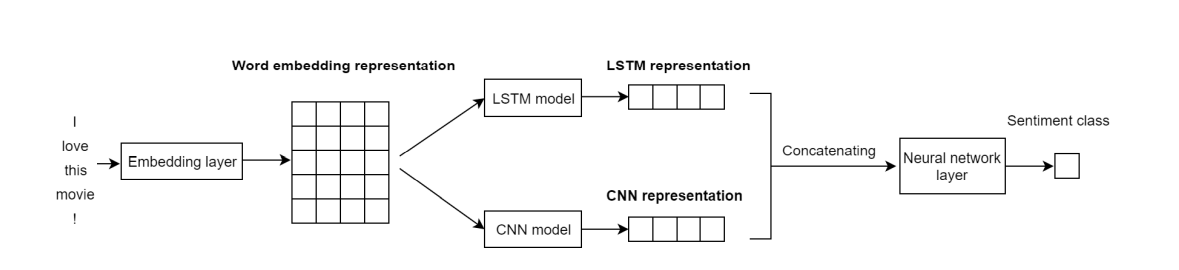

### **CNN + LSTM**

In [52]:
model_cnn_lstm = Sequential()
e = Embedding(10000, 200, weights=[embedding_matrix], input_length=150, trainable=True)
model_cnn_lstm.add(e)
model_cnn_lstm.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
model_cnn_lstm.add(MaxPooling1D())
model_cnn_lstm.add(Dropout(0.2))
model_cnn_lstm.add(LSTM(300))
model_cnn_lstm.add(Dense(256, activation='relu'))
model_cnn_lstm.add(Dense(3, activation='sigmoid'))
model_cnn_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc',f1_m,precision_m, recall_m])
history_cnn_lstm=model_cnn_lstm.fit(x_train_seq, labels_train, validation_data=(x_val_seq, labels_test), epochs=15, batch_size=40, verbose=2)

Epoch 1/15
102/102 - 19s - loss: 0.5777 - acc: 0.5225 - f1_m: 0.3672 - precision_m: 0.5597 - recall_m: 0.2887 - val_loss: 0.5387 - val_acc: 0.5559 - val_f1_m: 0.5214 - val_precision_m: 0.6012 - val_recall_m: 0.4615 - 19s/epoch - 181ms/step
Epoch 2/15
102/102 - 4s - loss: 0.4723 - acc: 0.6529 - f1_m: 0.6245 - precision_m: 0.7099 - recall_m: 0.5610 - val_loss: 0.5757 - val_acc: 0.5833 - val_f1_m: 0.5597 - val_precision_m: 0.5894 - val_recall_m: 0.5337 - 4s/epoch - 35ms/step
Epoch 3/15
102/102 - 4s - loss: 0.3991 - acc: 0.7243 - f1_m: 0.7158 - precision_m: 0.7672 - recall_m: 0.6721 - val_loss: 0.4876 - val_acc: 0.6392 - val_f1_m: 0.6253 - val_precision_m: 0.6903 - val_recall_m: 0.5721 - 4s/epoch - 36ms/step
Epoch 4/15
102/102 - 4s - loss: 0.3258 - acc: 0.7922 - f1_m: 0.7861 - precision_m: 0.8193 - recall_m: 0.7566 - val_loss: 0.5254 - val_acc: 0.6373 - val_f1_m: 0.6201 - val_precision_m: 0.6575 - val_recall_m: 0.5875 - 4s/epoch - 36ms/step
Epoch 5/15
102/102 - 4s - loss: 0.2533 - acc: 0.8

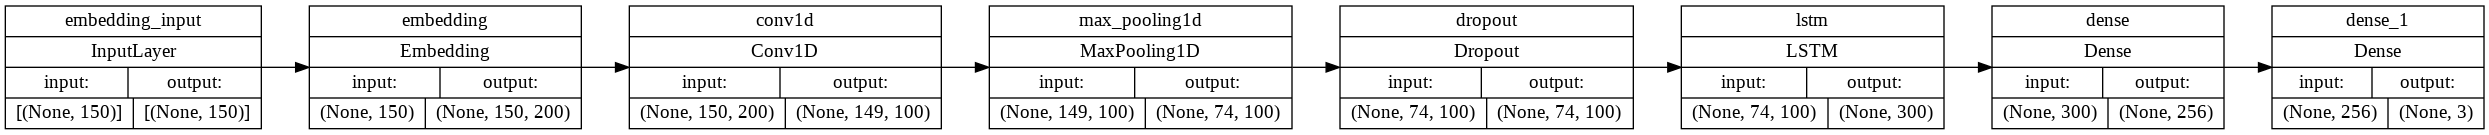

In [53]:
import tensorflow as tf
tf.keras.utils.plot_model(model_cnn_lstm, rankdir='LR', show_shapes=True)

### **LSTM + CNN**

In [54]:
model_lstm_cnn = Sequential()
e = Embedding(10000, 200, weights=[embedding_matrix], input_length=150, trainable=True)
model_lstm_cnn.add(e)
model_lstm_cnn.add(LSTM(300,return_sequences=True))
model_lstm_cnn.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
model_lstm_cnn.add(GlobalMaxPooling1D())
model_lstm_cnn.add(Dropout(0.2))
model_lstm_cnn.add(Dense(256, activation='relu'))
model_lstm_cnn.add(Dense(3, activation='sigmoid'))
model_lstm_cnn.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc',f1_m,precision_m, recall_m])

history_lstm_cnn=model_lstm_cnn.fit(x_train_seq, labels_train, batch_size=40, epochs=15,
                     validation_data=(x_val_seq, labels_test),verbose=2)

Epoch 1/15
102/102 - 10s - loss: 0.5391 - acc: 0.5721 - f1_m: 0.4513 - precision_m: 0.6405 - recall_m: 0.3902 - val_loss: 0.4939 - val_acc: 0.6275 - val_f1_m: 0.6067 - val_precision_m: 0.6854 - val_recall_m: 0.5462 - 10s/epoch - 97ms/step
Epoch 2/15
102/102 - 7s - loss: 0.4387 - acc: 0.6900 - f1_m: 0.6705 - precision_m: 0.7327 - recall_m: 0.6196 - val_loss: 0.4483 - val_acc: 0.6814 - val_f1_m: 0.6645 - val_precision_m: 0.7243 - val_recall_m: 0.6154 - 7s/epoch - 64ms/step
Epoch 3/15
102/102 - 7s - loss: 0.3653 - acc: 0.7586 - f1_m: 0.7469 - precision_m: 0.7908 - recall_m: 0.7086 - val_loss: 0.4618 - val_acc: 0.6951 - val_f1_m: 0.6910 - val_precision_m: 0.7223 - val_recall_m: 0.6635 - 7s/epoch - 64ms/step
Epoch 4/15
102/102 - 7s - loss: 0.2845 - acc: 0.8194 - f1_m: 0.8161 - precision_m: 0.8429 - recall_m: 0.7919 - val_loss: 0.4686 - val_acc: 0.6971 - val_f1_m: 0.6859 - val_precision_m: 0.7117 - val_recall_m: 0.6625 - 7s/epoch - 64ms/step
Epoch 5/15
102/102 - 7s - loss: 0.1928 - acc: 0.88

In [55]:
model_lstm_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 200)          2000000   
                                                                 
 lstm_1 (LSTM)               (None, 150, 300)          601200    
                                                                 
 conv1d_1 (Conv1D)           (None, 149, 100)          60100     
                                                                 
 global_max_pooling1d (Globa  (None, 100)              0         
 lMaxPooling1D)                                                  
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               25856     
                                                      

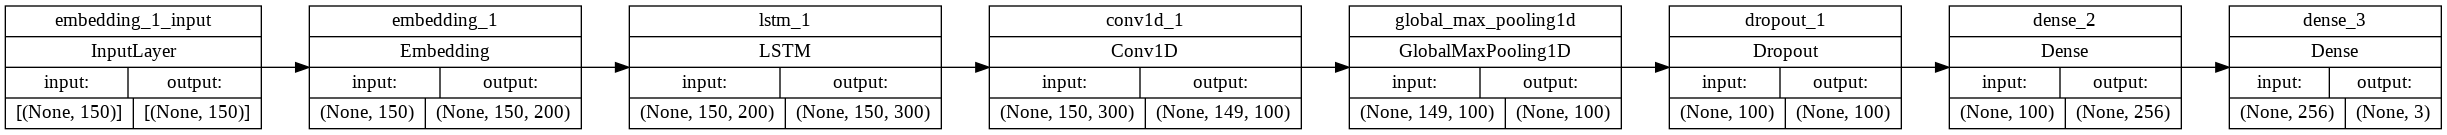

In [56]:
tf.keras.utils.plot_model(model_lstm_cnn, rankdir='LR', show_shapes=True)

### **LSTM + CNN UPDATE**

In [57]:
model_lstm_cnn_UPDATE = Sequential()
e = Embedding(10000, 200, weights=[embedding_matrix], input_length=150, trainable=True)
model_lstm_cnn_UPDATE.add(e)
model_lstm_cnn_UPDATE.add((LSTM(300,return_sequences=True,dropout=0.25, recurrent_dropout=0.1)))
model_lstm_cnn_UPDATE.add(Conv1D(filters=128, kernel_size=7, padding='same', activation='relu', strides=1))
model_lstm_cnn_UPDATE.add(MaxPooling1D())
model_lstm_cnn_UPDATE.add(Conv1D(filters=256,kernel_size=5, activation='relu',padding='same',strides=1))
model_lstm_cnn_UPDATE.add(MaxPooling1D())
model_lstm_cnn_UPDATE.add(Conv1D(filters=512, kernel_size=3, activation='relu',padding='same',strides=1))
model_lstm_cnn_UPDATE.add(MaxPooling1D())
model_lstm_cnn_UPDATE.add(Flatten())
model_lstm_cnn_UPDATE.add(Dense(256, activation='relu'))
model_lstm_cnn_UPDATE.add(Dropout(0.2))
model_lstm_cnn_UPDATE.add(Dense(3, activation='sigmoid'))
model_lstm_cnn_UPDATE.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc',f1_m,precision_m, recall_m])
filepath="save_weights/LSTM_CNN_best_weights.{epoch:02d}-{val_acc:.41f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history_lstm_cnn_UPDATE=model_lstm_cnn_UPDATE.fit(x_train_seq, labels_train, batch_size=40, epochs=30,
                     validation_data=(x_val_seq, labels_test), verbose=2, callbacks=[checkpoint])

Epoch 1/30

Epoch 00001: val_acc improved from -inf to 0.57059, saving model to save_weights/LSTM_CNN_best_weights.01-0.57058823108673095703125000000000000000000.hdf5
102/102 - 48s - loss: 0.5900 - acc: 0.5015 - f1_m: 0.2999 - precision_m: 0.4609 - recall_m: 0.2336 - val_loss: 0.5376 - val_acc: 0.5706 - val_f1_m: 0.5273 - val_precision_m: 0.6458 - val_recall_m: 0.4481 - 48s/epoch - 473ms/step
Epoch 2/30

Epoch 00002: val_acc improved from 0.57059 to 0.66176, saving model to save_weights/LSTM_CNN_best_weights.02-0.66176468133926391601562500000000000000000.hdf5
102/102 - 45s - loss: 0.4829 - acc: 0.6490 - f1_m: 0.6156 - precision_m: 0.7108 - recall_m: 0.5458 - val_loss: 0.4723 - val_acc: 0.6618 - val_f1_m: 0.6295 - val_precision_m: 0.7335 - val_recall_m: 0.5529 - 45s/epoch - 441ms/step
Epoch 3/30

Epoch 00003: val_acc did not improve from 0.66176
102/102 - 44s - loss: 0.4129 - acc: 0.7191 - f1_m: 0.6989 - precision_m: 0.7655 - recall_m: 0.6451 - val_loss: 0.5037 - val_acc: 0.6422 - val_f

In [58]:
model_lstm_cnn_UPDATE.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 200)          2000000   
                                                                 
 lstm_2 (LSTM)               (None, 150, 300)          601200    
                                                                 
 conv1d_2 (Conv1D)           (None, 150, 128)          268928    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 75, 128)          0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 75, 256)           164096    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 37, 256)          0         
 1D)                                                  

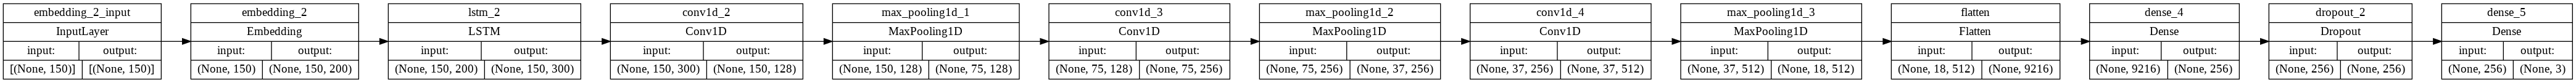

In [59]:
tf.keras.utils.plot_model(model_lstm_cnn_UPDATE, rankdir='LR', show_shapes=True)

In [60]:
print("Loss of the model is - " , model_lstm_cnn_UPDATE.evaluate(x_val_seq, labels_test)[0])
print("Accuracy of the model is - " , model_lstm_cnn_UPDATE.evaluate(x_val_seq, labels_test)[1]*100 , "%")

32/32 [==============================] - 3s 102ms/step - loss: 1.8793 - acc: 0.6882 - f1_m: 0.6861 - precision_m: 0.6893 - recall_m: 0.6832
Loss of the model is -  1.8793052434921265
32/32 [==============================] - 3s 100ms/step - loss: 1.8793 - acc: 0.6882 - f1_m: 0.6861 - precision_m: 0.6893 - recall_m: 0.6832
Accuracy of the model is -  68.82352828979492 %


## **Analysis after Model Training**

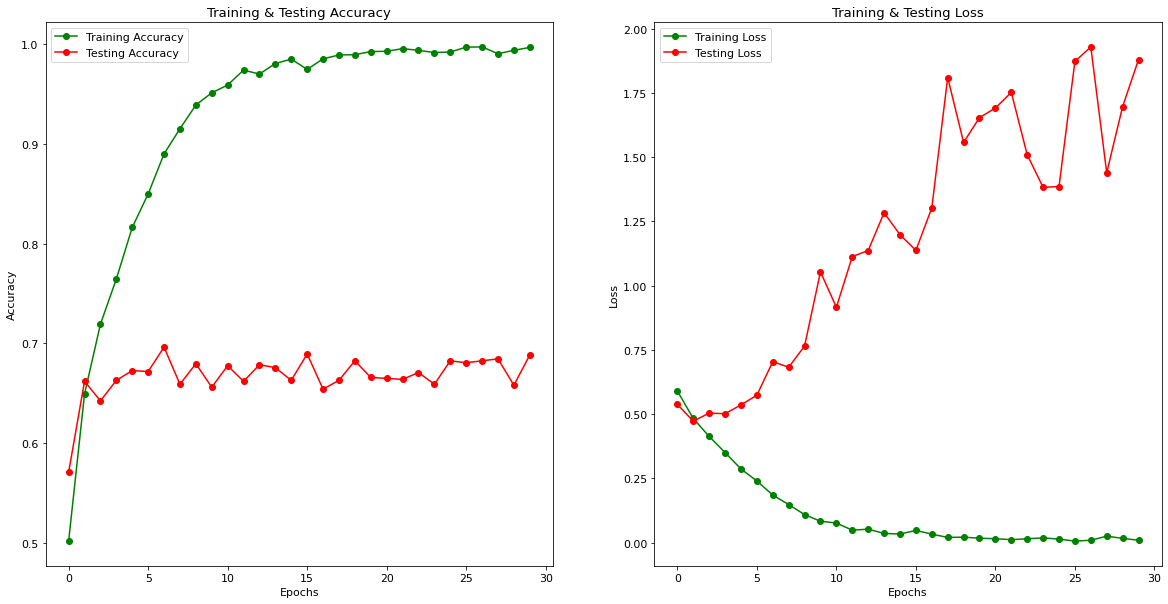

In [61]:
epochs = [i for i in range(30)]
fig , ax = plt.subplots(1,2)
train_acc = history_lstm_cnn_UPDATE.history['acc']
train_loss = history_lstm_cnn_UPDATE.history['loss']
val_acc = history_lstm_cnn_UPDATE.history['val_acc']
val_loss = history_lstm_cnn_UPDATE.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

## **WordCloud**

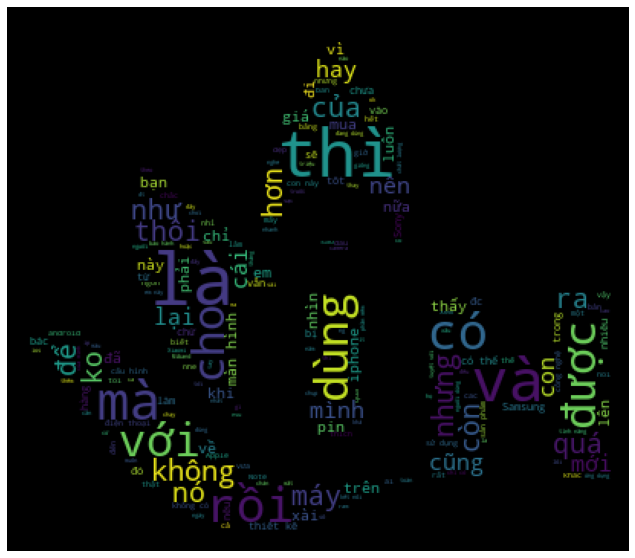

In [62]:
from wordcloud import WordCloud
from PIL import Image

logo_iuh = np.array(Image.open("logo_iuh.jpg"))

text = pd.read_csv('VLSP2016_SA-new.csv')
text_content = " ".join(review for review in text.content)

wordcloud = WordCloud(background_color="black", max_words=2000, mask=logo_iuh).generate(text_content)

from matplotlib import rcParams
rcParams ['figure.figsize'] = 18,10
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## **Web Deploy**

### **Posivite**

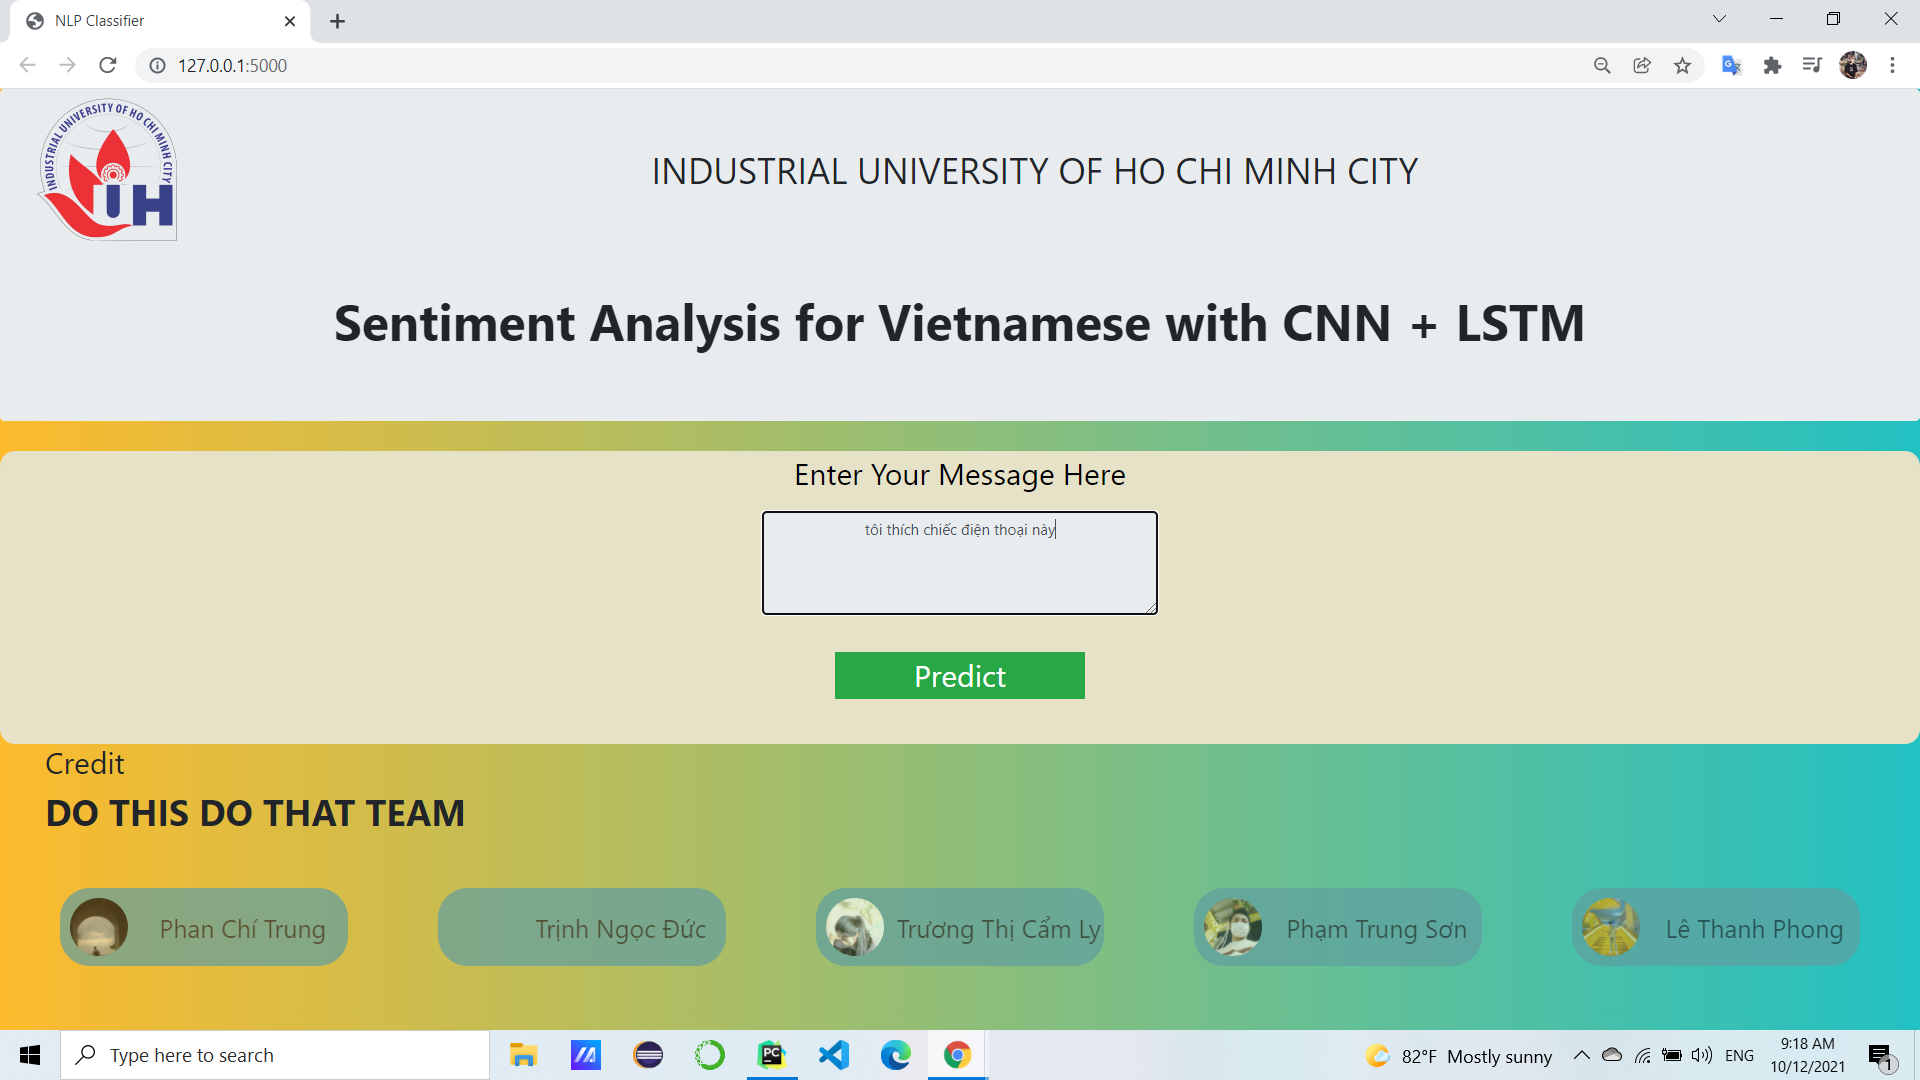

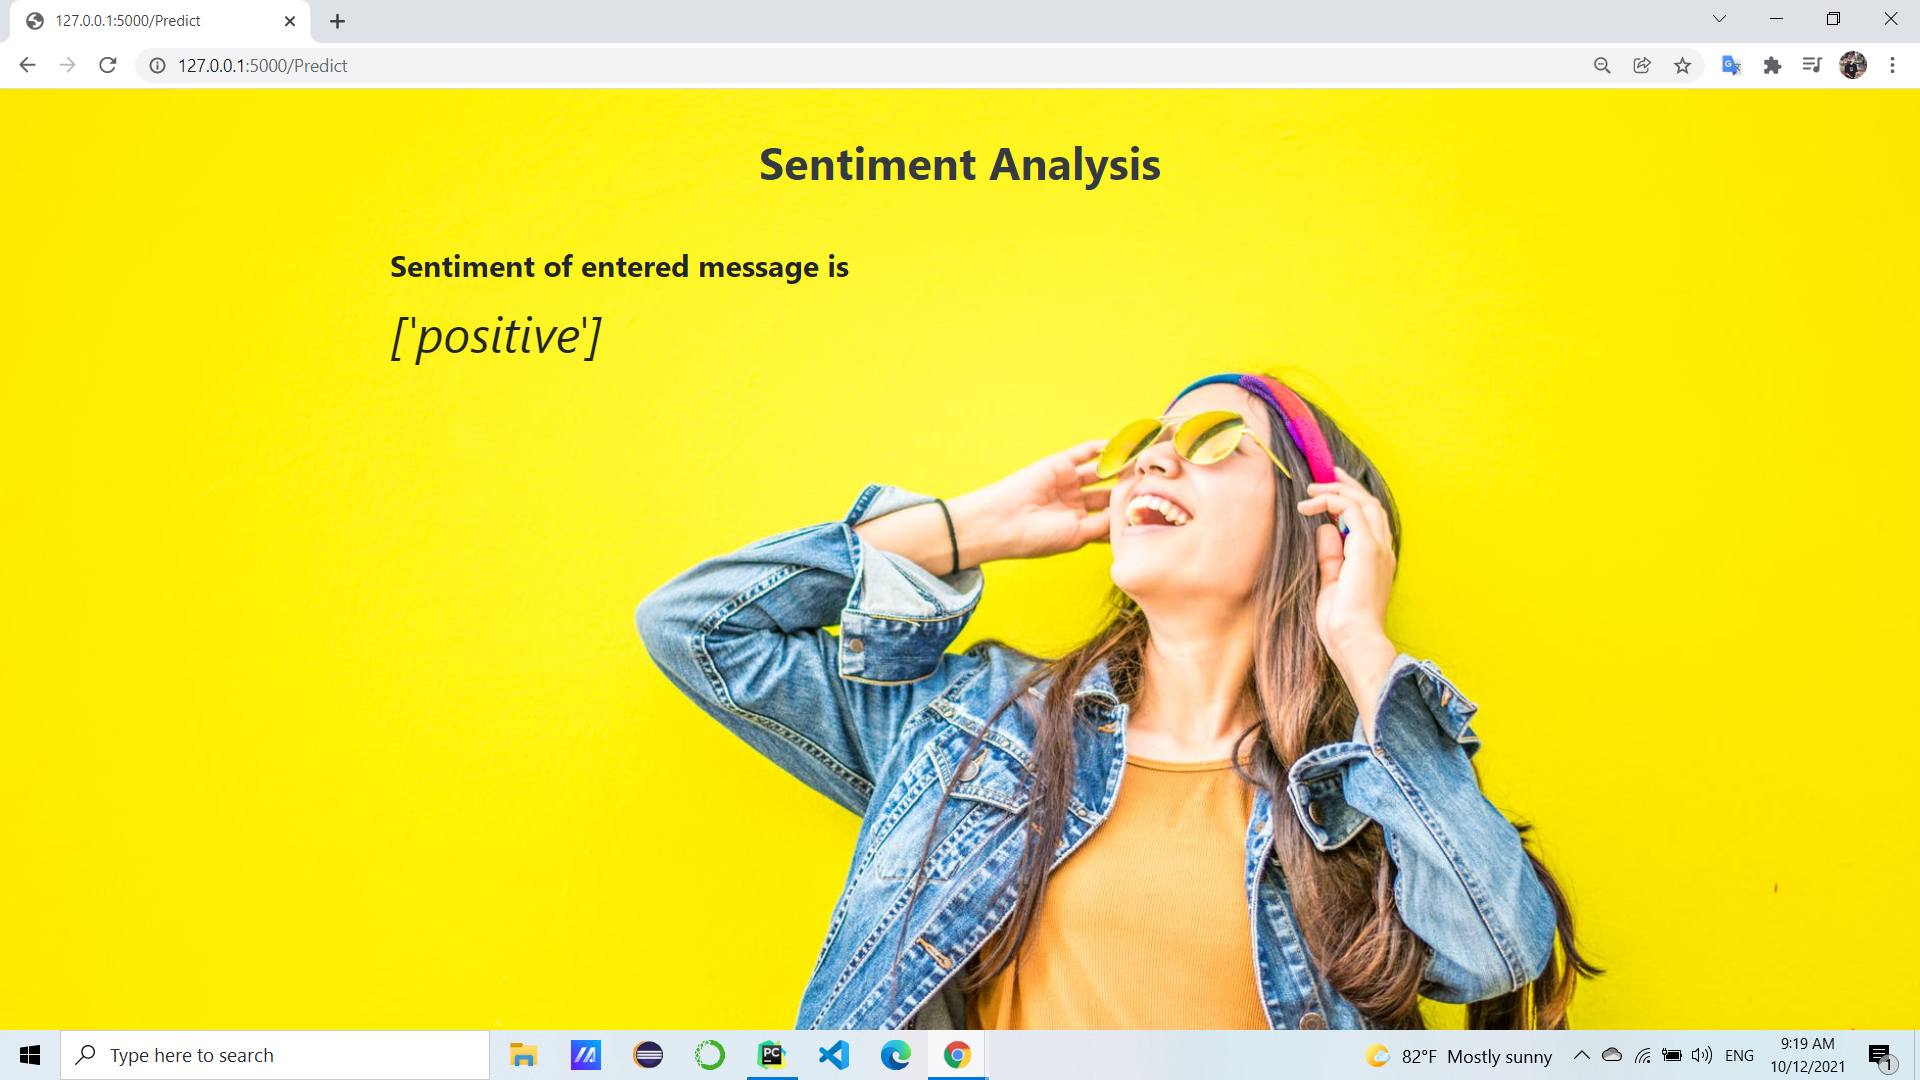

### **Negative**

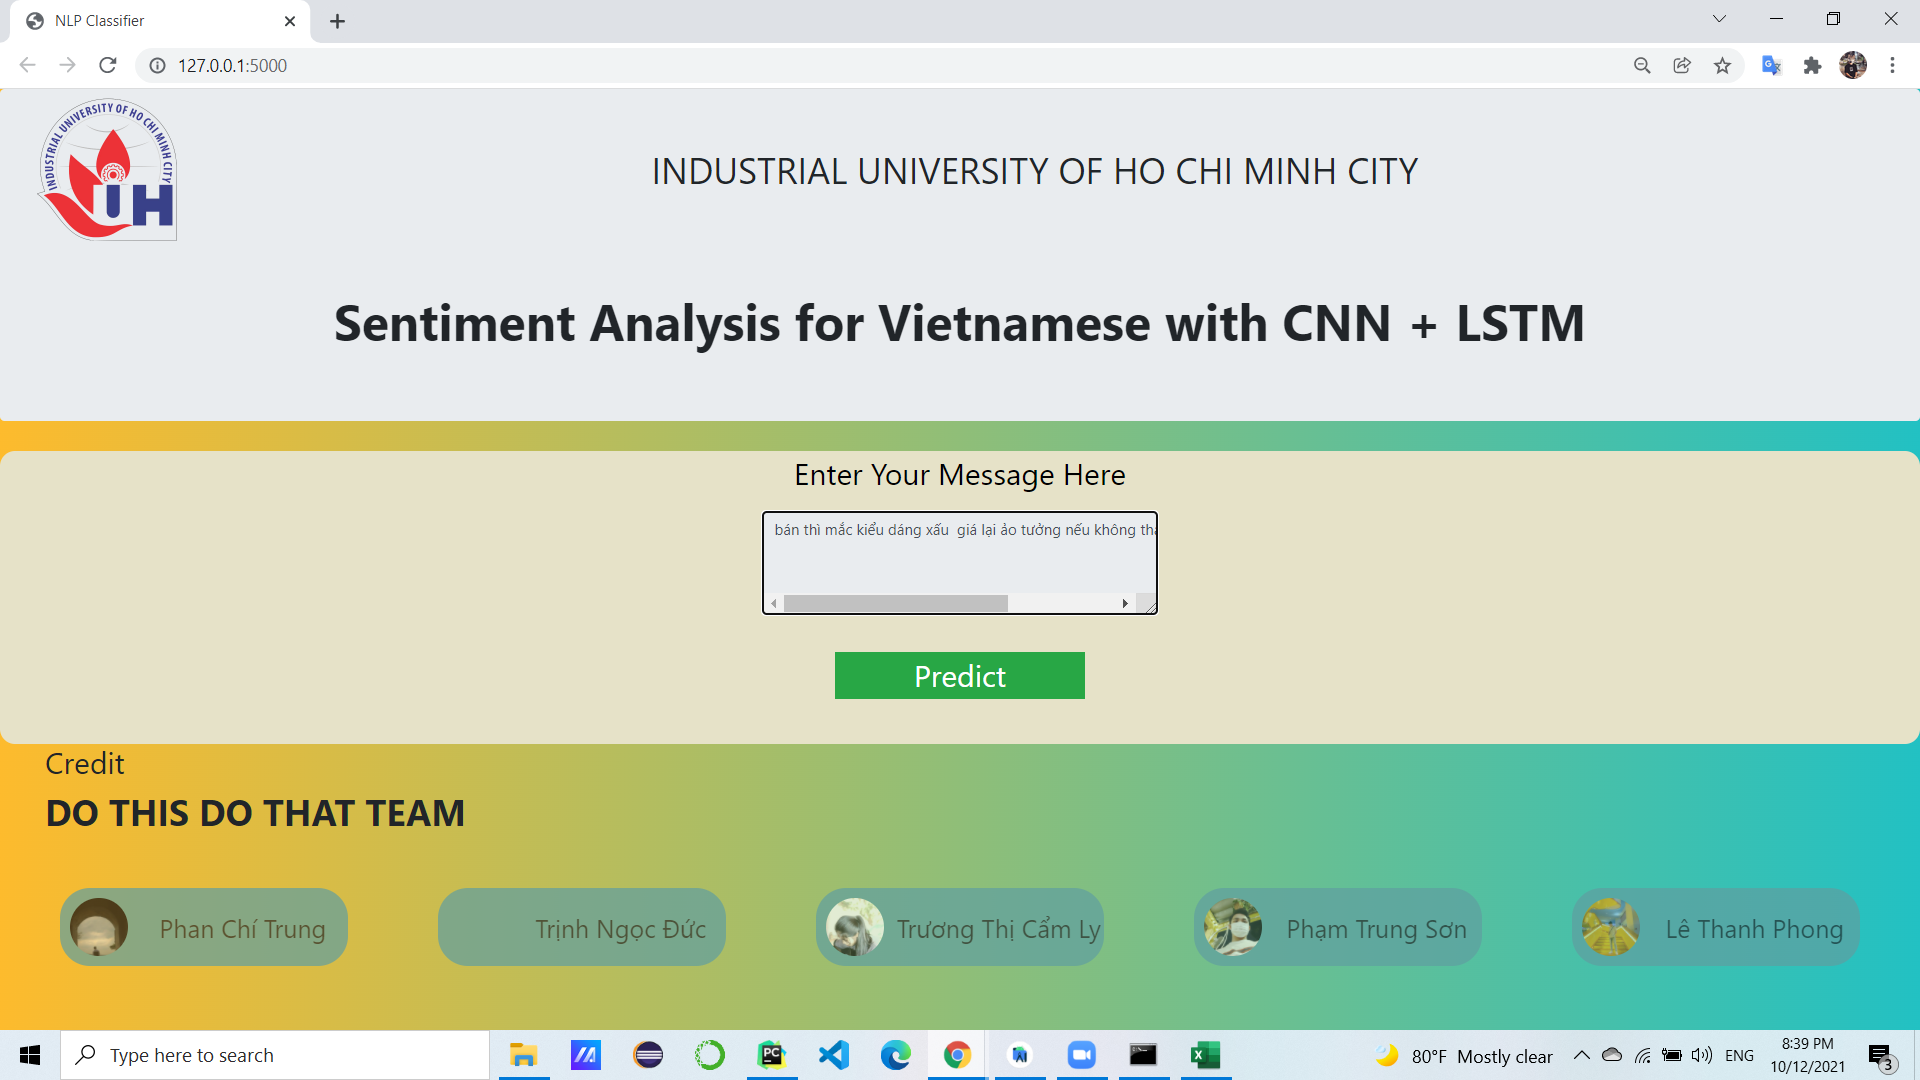

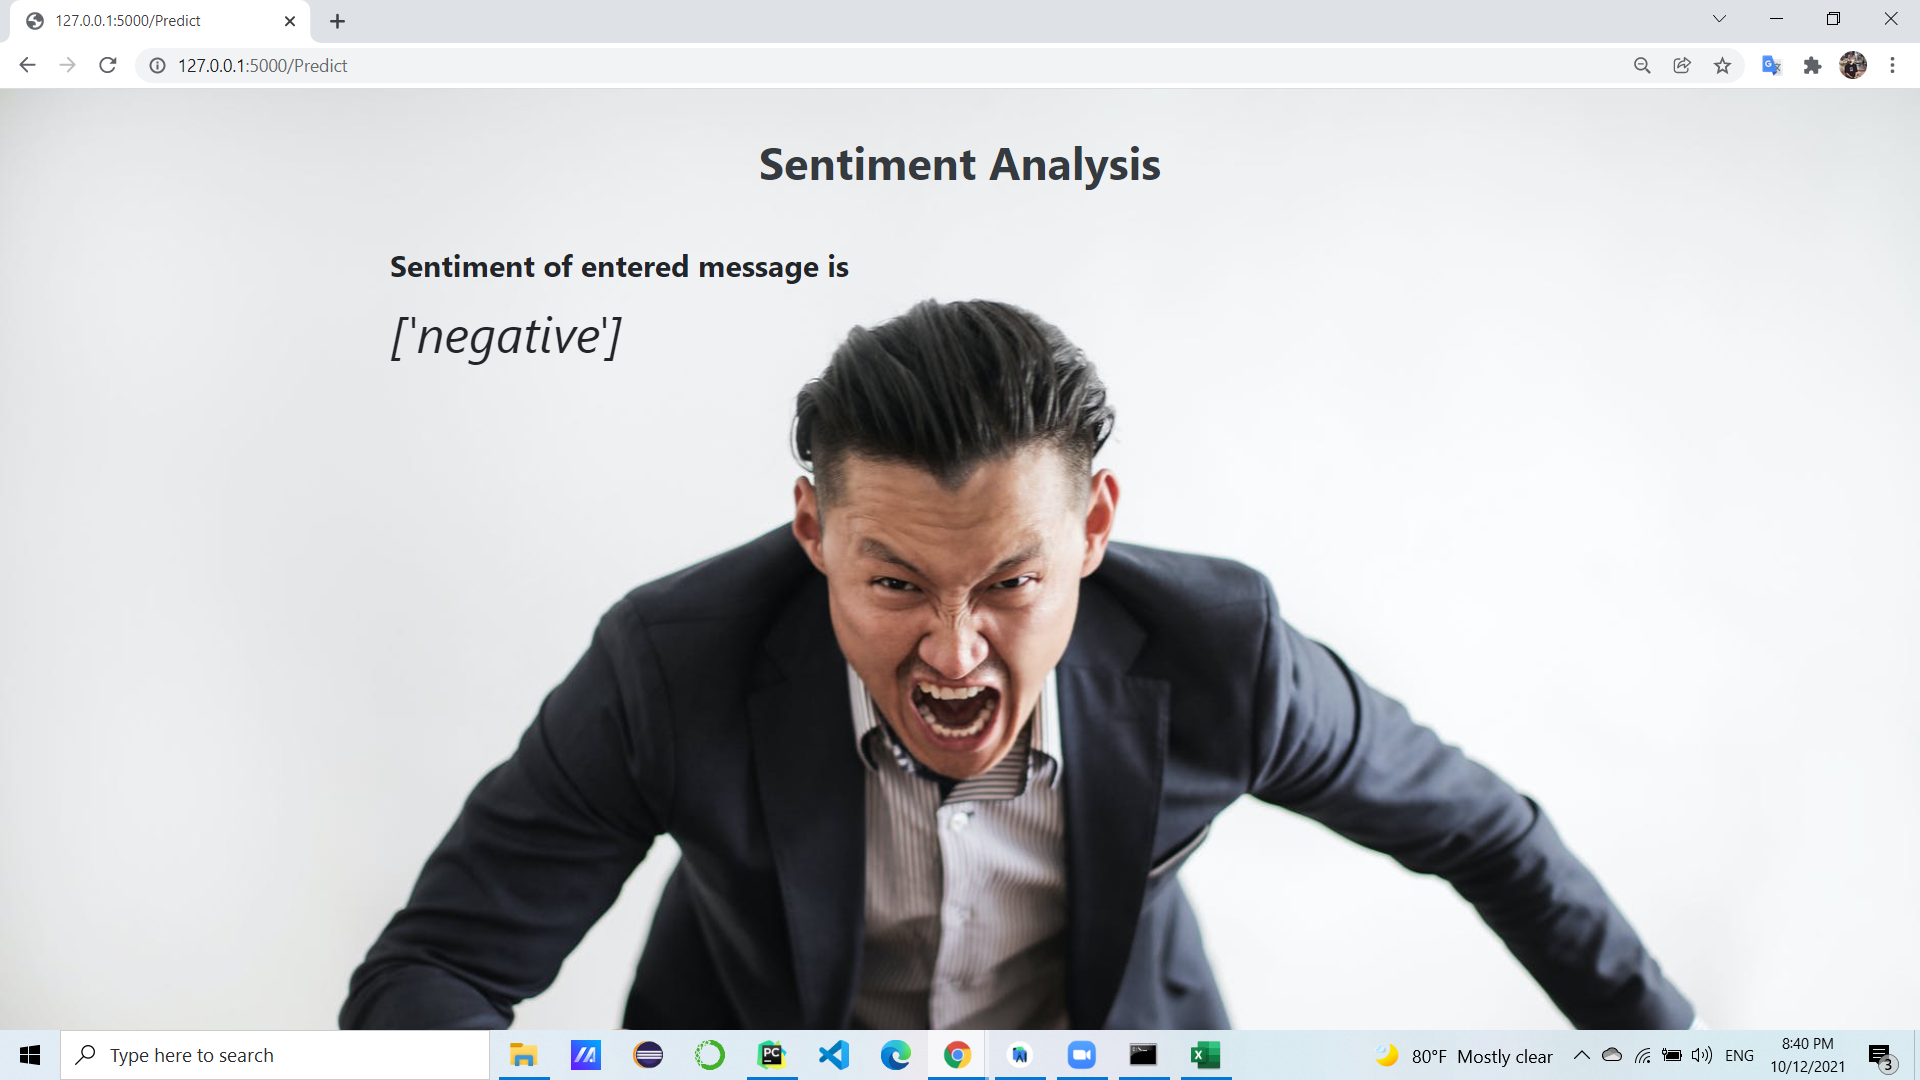

### **Neutral**

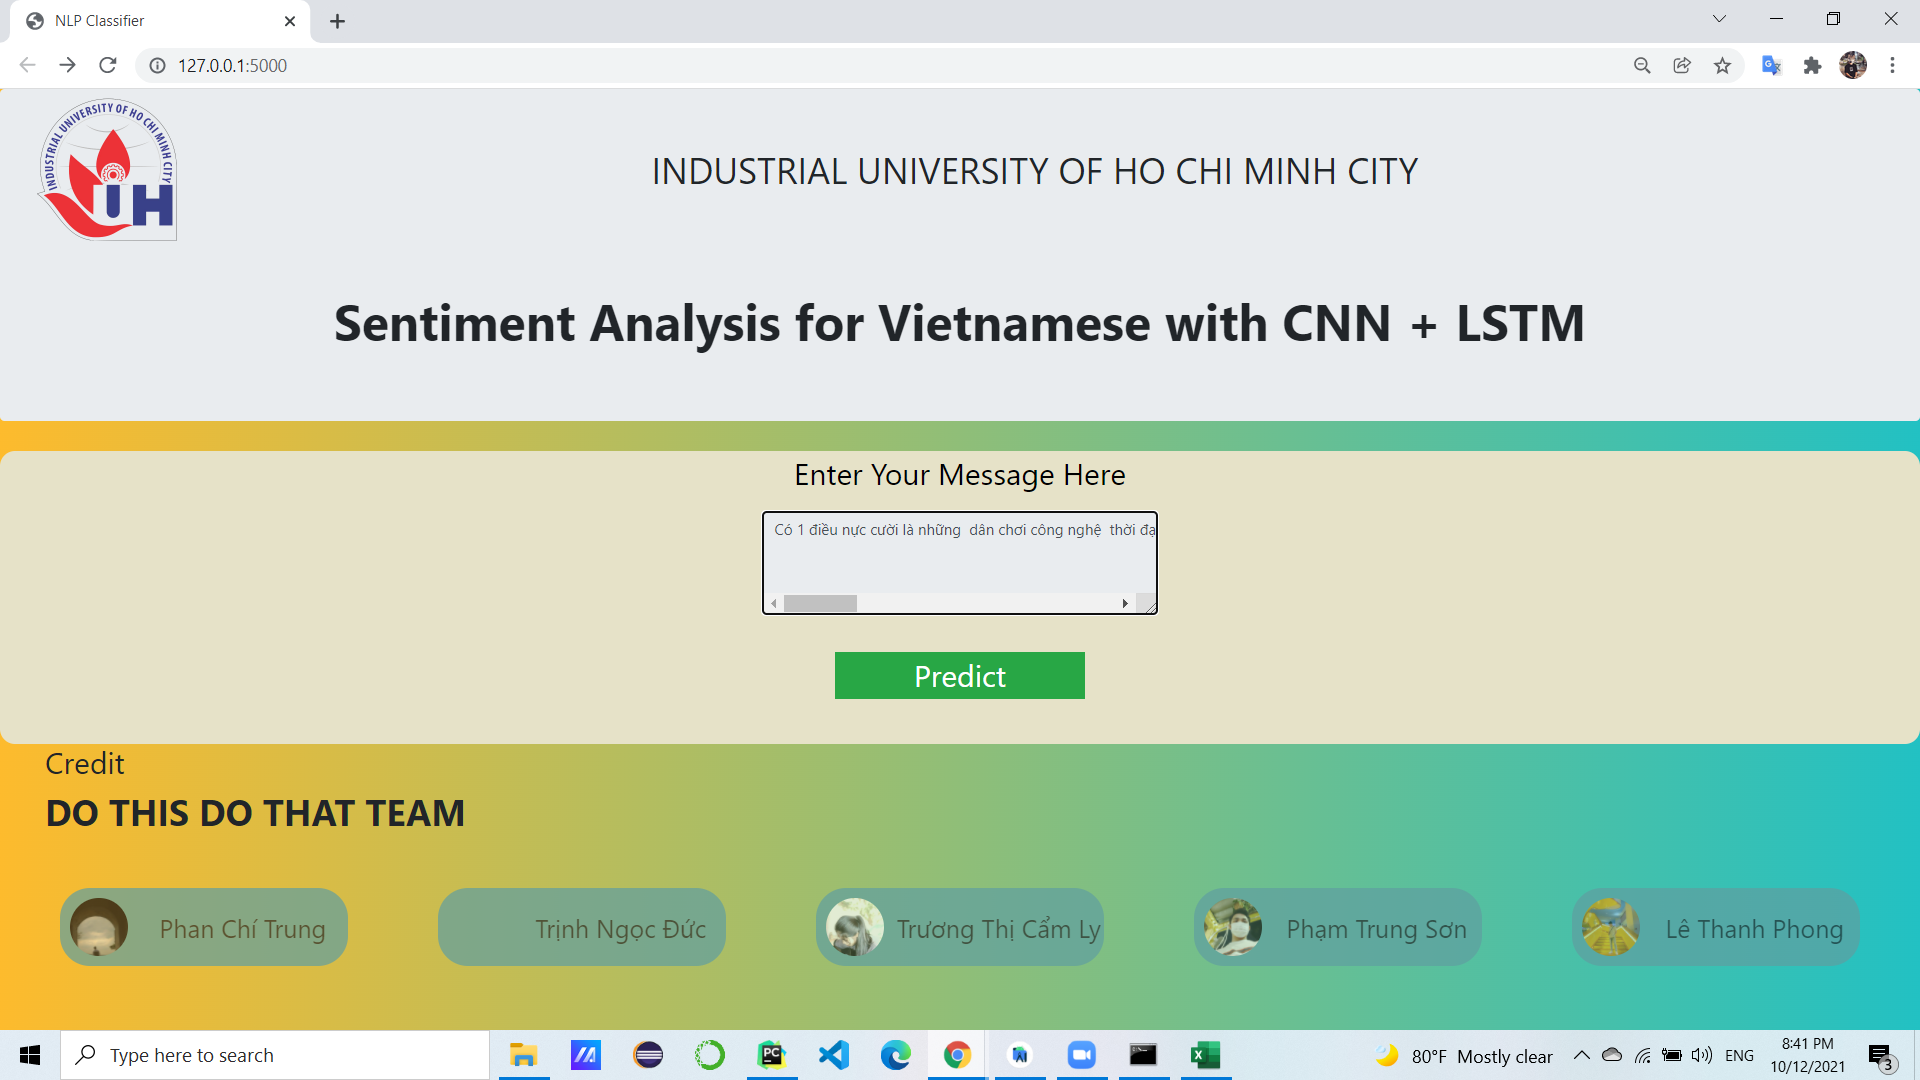

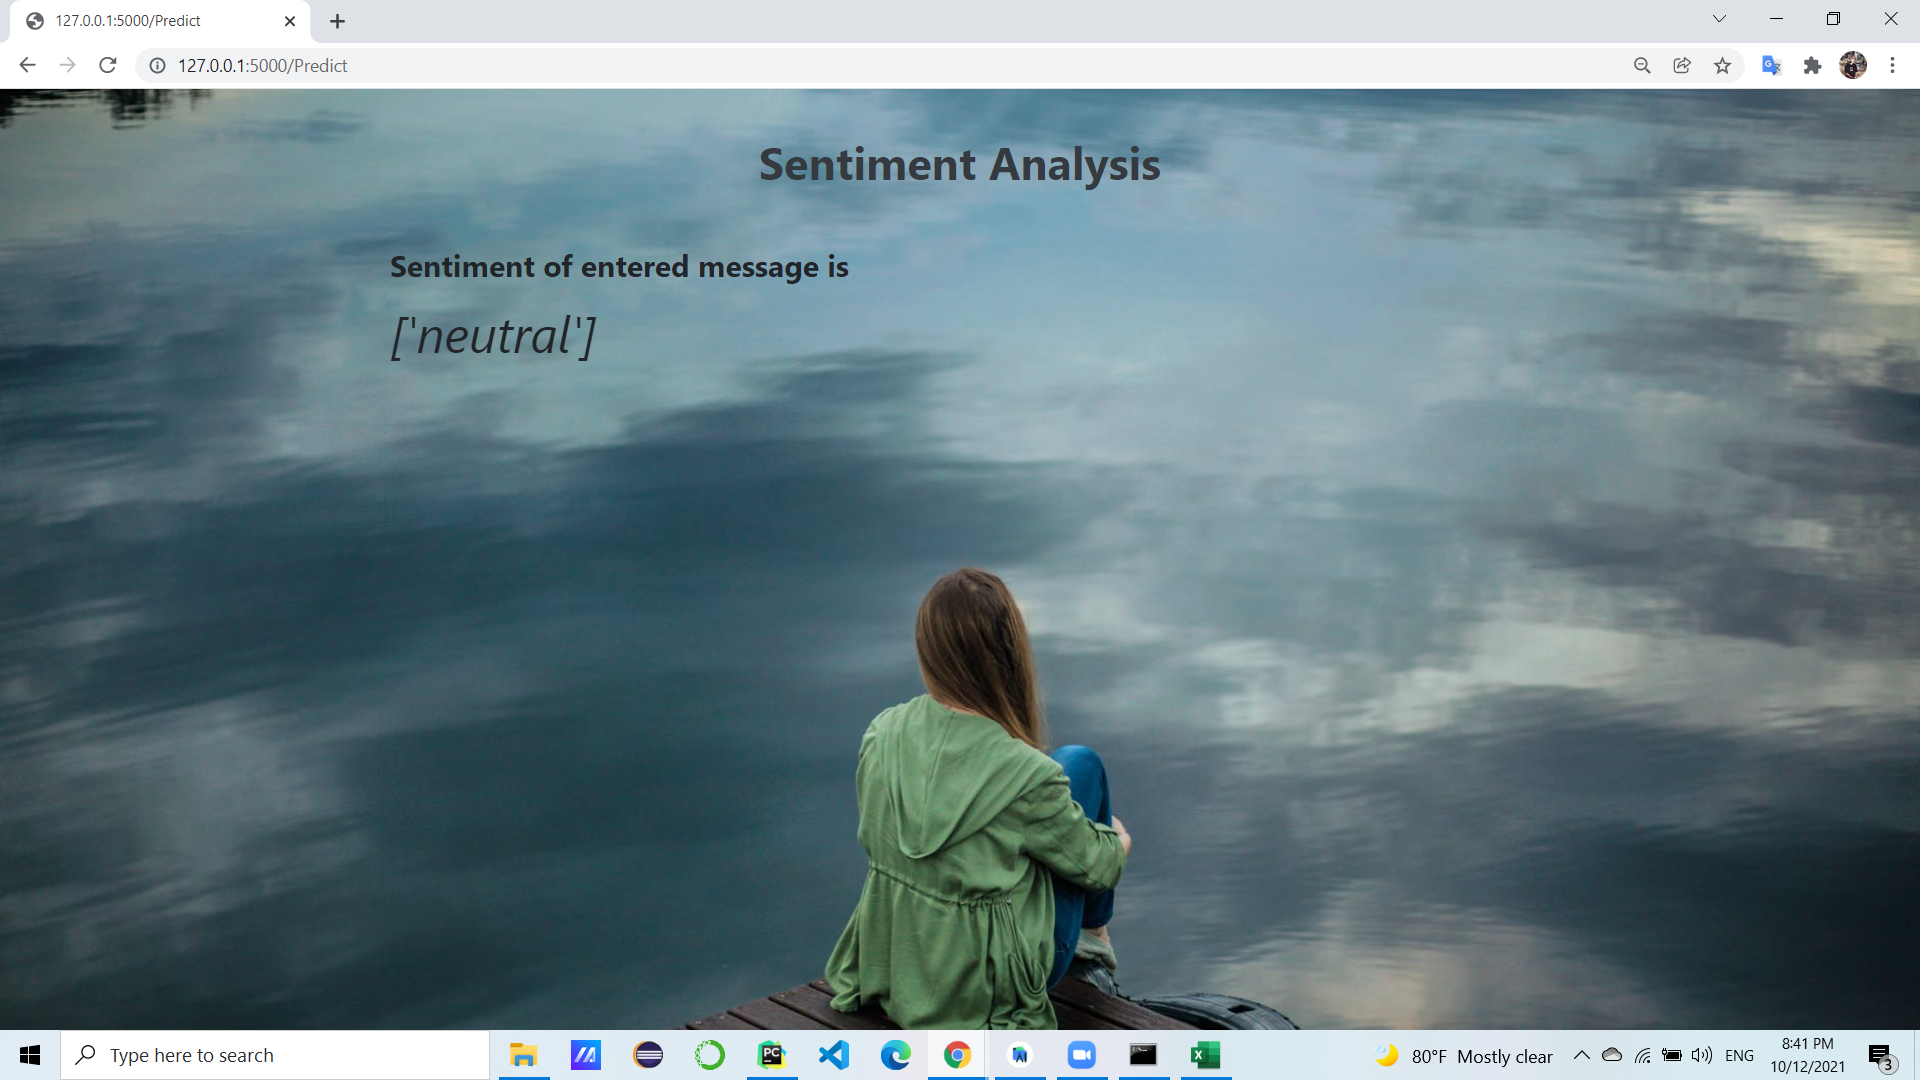